# Problem Statement
## Business Problem Overview
### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

### 1. Importing the Dependency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

### Importing the data and analysing the info

In [2]:
data_original = pd.read_csv("telecom_churn_data_eval.csv")

In [3]:
data=data_original.copy()

In [4]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
# Checking the number of rows and columns 
data.shape

(61903, 226)

In [6]:
# Checking for duplicate records
data[data.duplicated()]

Empty DataFrame
Columns: [mobile_number, circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9, arpu_6, arpu_7, arpu_8, arpu_9, onnet_mou_6, onnet_mou_7, onnet_mou_8, onnet_mou_9, offnet_mou_6, offnet_mou_7, offnet_mou_8, offnet_mou_9, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_ic_mou_9, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, roam_og_mou_9, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2t_mou_9, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2m_mou_9, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2f_mou_9, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_t2c_mou_9, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, loc_og_mou_9, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2t_mou_9, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2m_mou_9, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_t2f_mou_9, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_og_mou_6, std_og_mou_7, std_og_mou_8, std_og_mou_9, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, isd_og_mou_9, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, spl_og_mou_9, og_others_6, og_others_7, og_others_8, og_others_9, total_og_mou_6, total_og_mou_7, total_og_mou_8, total_og_mou_9, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2t_mou_9, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2m_mou_9, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_t2f_mou_9, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, ...]
Index: []

In [7]:
# Checking the datatype of the columns
data.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61903 entries, 0 to 61902
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
# Statistical view of the data
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   6.190300e+04    61903.0         61258.0         61258.0   
mean    7.001206e+09      109.0             0.0             0.0   
std     6.955908e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000604e+09      109.0             0.0             0.0   
50%     7.001201e+09      109.0             0.0             0.0   
75%     7.001810e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         61258.0  61903.000000  61903.000000  61903.000000  61903.000000   
mean              0.0    282.565653    277.348171    278.744122    261.220715   
std               0.0    333.245489    340.598847    346.639595    347.622845   
min               0.0  -2041.228000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.553000     87.460000     84.344000     63.029500   
50%               0.0    197.410000    191.176000    192.375000    177.021000   
75%               0.0    371.326500    364.115000    368.489000    352.409500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  59475.000000  59484.000000  58594.000000  57116.000000  59475.000000   
mean     130.854932    132.277750    131.898821    129.062858    197.842265   
std      292.307975    306.300692    309.070823    303.743515    320.219319   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.515000      5.310000     34.730000   
50%       34.280000     32.380000     32.590000     29.990000     95.880000   
75%      118.300000    115.032500    115.737500    112.290000    231.710000   
max     6504.340000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  59484.000000  58594.000000  57116.000000   59475.000000   59484.000000   
mean     197.010004    197.172004    190.094230       9.876021       7.242710   
std      328.604086    329.913446    319.723458      58.324281      56.625303   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.187500     31.580000     26.990000       0.000000       0.000000   
50%       91.910000     91.730000     87.670000       0.000000       0.000000   
75%      227.002500    228.570000    219.415000       0.000000       0.000000   
max     9667.130000  13547.840000   6959.730000    2850.980000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   58594.000000   57116.000000   59475.000000   59484.000000   
mean        7.257751       6.422968      13.898335       9.818856   
std        54.937141      52.398006      68.863696      57.545510   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    2165.440000    1878.860000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   58594.000000   57116.000000      59475.000000      59484.000000   
mean       10.072529       8.566252         46.850321         46.282285   
std        65.078876      57.661290        149.349212        153.885150   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.680000          1.650000   
50%         0.000000       0.000000         11.930000         11.710000   
75%         0.000000       0.000000         41.180000         40.260000   
max      

### 2. Data Cleaning

In [9]:
# Checking the missing values in the top 50% missing columns in the data
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)[:40]

arpu_3g_6                   74.79
night_pck_user_6            74.79
total_rech_data_6           74.79
arpu_2g_6                   74.79
max_rech_data_6             74.79
fb_user_6                   74.79
av_rech_amt_data_6          74.79
date_of_last_rech_data_6    74.79
count_rech_2g_6             74.79
count_rech_3g_6             74.79
date_of_last_rech_data_7    74.37
total_rech_data_7           74.37
fb_user_7                   74.37
max_rech_data_7             74.37
night_pck_user_7            74.37
count_rech_2g_7             74.37
av_rech_amt_data_7          74.37
arpu_2g_7                   74.37
count_rech_3g_7             74.37
arpu_3g_7                   74.37
total_rech_data_9           74.05
count_rech_3g_9             74.05
fb_user_9                   74.05
max_rech_data_9             74.05
arpu_3g_9                   74.05
date_of_last_rech_data_9    74.05
night_pck_user_9            74.05
arpu_2g_9                   74.05
count_rech_2g_9             74.05
av_rech_amt_da

In [10]:
len(list(round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending = False)[:40]))

40

In [11]:
# Deleting the date columns since they do not have much value and are also more than 75% missing values
data = data.drop(columns = ['date_of_last_rech_9','date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6',
                                   'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                                   'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'])
data.shape

(61903, 214)

In [12]:
# Checking unique values in the columns
data.nunique()

mobile_number         61903
circle_id                 1
loc_og_t2o_mou            1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
arpu_6                54857
arpu_7                54767
arpu_8                53568
arpu_9                51328
onnet_mou_6           18637
onnet_mou_7           18689
onnet_mou_8           18365
onnet_mou_9           17969
offnet_mou_6          24568
offnet_mou_7          24501
offnet_mou_8          24367
offnet_mou_9          23579
roam_ic_mou_6          4888
roam_ic_mou_7          3965
roam_ic_mou_8          3985
roam_ic_mou_9          3607
roam_og_mou_6          6050
roam_og_mou_7          4934
roam_og_mou_8          4829
roam_og_mou_9          4327
loc_og_t2t_mou_6      10887
loc_og_t2t_mou_7      10799
loc_og_t2t_mou_8      10701
loc_og_t2t_mou_9      10424
loc_og_t2m_mou_6      16993
loc_og_t2m_mou_7      16799
loc_og_t2m_mou_8      16711
loc_og_t2m_mou_9      16380
loc_og_t2f_mou_6       3175
loc_og_t2f_mou_7       3211
loc_og_t2f_mou_8    

In [13]:
# Removing the columns having 1 unique value since they will not add any information 
data_2 = data[:]
data_2 = data.drop(columns = ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou',
                         'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9',
                         'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'])
data_2.shape

(61903, 202)

In [14]:
# Checking the missing values again in the columns
round(100*(data_2.isnull().sum()/len(data_2.index)), 2).sort_values(ascending = False)

count_rech_3g_6       74.79
fb_user_6             74.79
total_rech_data_6     74.79
max_rech_data_6       74.79
count_rech_2g_6       74.79
av_rech_amt_data_6    74.79
arpu_3g_6             74.79
night_pck_user_6      74.79
arpu_2g_6             74.79
arpu_3g_7             74.37
total_rech_data_7     74.37
fb_user_7             74.37
max_rech_data_7       74.37
count_rech_3g_7       74.37
arpu_2g_7             74.37
count_rech_2g_7       74.37
av_rech_amt_data_7    74.37
night_pck_user_7      74.37
count_rech_3g_9       74.05
fb_user_9             74.05
total_rech_data_9     74.05
arpu_3g_9             74.05
max_rech_data_9       74.05
count_rech_2g_9       74.05
av_rech_amt_data_9    74.05
arpu_2g_9             74.05
night_pck_user_9      74.05
total_rech_data_8     73.62
night_pck_user_8      73.62
max_rech_data_8       73.62
arpu_3g_8             73.62
count_rech_2g_8       73.62
count_rech_3g_8       73.62
av_rech_amt_data_8    73.62
arpu_2g_8             73.62
fb_user_8           

In [15]:
# Imputing the missing values with 0 for the recharge variables since missing value ideally means no recharge data
data_3 = data_2[:]
columns_to_fill = ['count_rech_3g_6','av_rech_amt_data_6','max_rech_data_6','total_rech_data_6','arpu_3g_6','arpu_2g_6',
                   'count_rech_2g_6','count_rech_3g_7','av_rech_amt_data_7','max_rech_data_7','total_rech_data_7','arpu_3g_7',
                   'arpu_2g_7','count_rech_2g_7','count_rech_3g_8','av_rech_amt_data_8','max_rech_data_8','total_rech_data_8',
                   'arpu_3g_8','arpu_2g_8','count_rech_2g_8','count_rech_3g_9','av_rech_amt_data_9','max_rech_data_9',
                   'total_rech_data_9','arpu_3g_9','arpu_2g_9','count_rech_2g_9']

for i in columns_to_fill:
    data_3[i] = data_3[i].fillna(0)

# Checking the missing values again in the columns
round(100*(data_3.isnull().sum()/len(data_3.index)), 2).sort_values(ascending = False)

fb_user_6             74.79
night_pck_user_6      74.79
night_pck_user_7      74.37
fb_user_7             74.37
fb_user_9             74.05
night_pck_user_9      74.05
fb_user_8             73.62
night_pck_user_8      73.62
og_others_9            7.73
loc_ic_t2t_mou_9       7.73
std_ic_t2f_mou_9       7.73
loc_og_t2f_mou_9       7.73
std_ic_t2m_mou_9       7.73
loc_og_mou_9           7.73
std_ic_t2t_mou_9       7.73
std_og_t2t_mou_9       7.73
std_og_t2m_mou_9       7.73
loc_ic_mou_9           7.73
std_og_t2f_mou_9       7.73
loc_ic_t2f_mou_9       7.73
loc_og_t2m_mou_9       7.73
isd_og_mou_9           7.73
loc_ic_t2m_mou_9       7.73
spl_og_mou_9           7.73
std_og_mou_9           7.73
loc_og_t2c_mou_9       7.73
roam_og_mou_9          7.73
onnet_mou_9            7.73
isd_ic_mou_9           7.73
offnet_mou_9           7.73
spl_ic_mou_9           7.73
roam_ic_mou_9          7.73
std_ic_mou_9           7.73
loc_og_t2t_mou_9       7.73
ic_others_9            7.73
og_others_8         

In [16]:
data_3[data_3.isna().any(axis=1)]

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0         7000842753  197.385  214.816  213.803   21.100          NaN   
1         7001865778   34.047  355.074  268.321   86.285        24.11   
2         7001625959  167.690  189.058  210.226  290.714        11.54   
3         7001204172  221.338  251.102  508.054  389.500        99.91   
4         7000142493  261.636  309.876  238.174  163.426        50.31   
...              ...      ...      ...      ...      ...          ...   
61898     7001541248  161.979   91.746   57.343  159.923         0.43   
61899     7001446894  268.459  350.831  301.147  393.652        49.61   
61900     7000190618  337.363  599.212  548.557  739.713       274.53   
61901     7000163204    0.000   66.210  130.393  178.072          NaN   
61902     7001263574  238.462  292.366  515.864  238.256        27.91   

       onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0              NaN         0.00          NaN           NaN           NaN   
1            78.68         7.68        18.34         15.74         99.84   
2            55.24        37.26        74.81        143.33        220.59   
3            54.39       310.98       241.71        123.31        109.01   
4           149.44        83.89        58.78         76.96         91.88   
...            ...          ...          ...           ...           ...   
61898         7.25         4.48        52.29        209.13        105.74   
61899        21.58        14.09        11.21        251.14        297.78   
61900       364.31       315.39       403.48        282.98        355.13   
61901        40.88       163.11       191.33           NaN          4.74   
61902        34.79        41.53        24.43         79.13        117.03   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00           NaN            NaN            NaN   
1            304.76         53.76            0.0           0.00   
2            208.36        118.91            0.0           0.00   
3             71.68        113.54            0.0          54.86   
4            124.26         45.81            0.0           0.00   
...             ...           ...            ...            ...   
61898         20.11        175.01            0.0           0.00   
61899        224.19        260.29            0.0           0.00   
61900        278.38        470.41            0.0           0.00   
61901         11.81         80.18            NaN           0.00   
61902        134.29        111.21            0.0           0.00   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0               0.00            NaN            NaN            NaN   
1               0.00           0.00            0.0           0.00   
2               0.00          38.49            0.0           0.00   
3              44.38           0.00            0.0          28.09   
4               0.00           0.00            0.0           0.00   
...              ...            ...            ...            ...   
61898           0.00           0.00            0.0           0.00   
61899           0.00           0.00            0.0           0.00   
61900           0.00           0.00            0.0           0.00   
61901           0.00           3.45            NaN           0.00   
61902           0.00           0.00            0.0           0.00   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0               0.00            NaN               NaN               NaN   
1               0.00           0.00             23.88             74.56   
2               0.00          70.94              7.19             28.74   
3              39.04           0.00             73.68             34.81   
4               0.00           0.00             50.31            149.44   
...              ...            ...               ...               ...   
61898           0.00           0.00              0.43     

In [17]:
# Since the above columns having missing values means that there is no data oresent, let's impute it with 0
columns_to_fill2 = ['std_ic_t2f_mou_9','roam_ic_mou_9','spl_ic_mou_9','loc_og_mou_9','loc_og_t2f_mou_9','spl_og_mou_9','isd_ic_mou_9',
           'loc_ic_t2m_mou_9','loc_og_t2m_mou_9','std_og_t2t_mou_9','loc_og_t2t_mou_9','ic_others_9','std_ic_mou_9',
           'roam_og_mou_9','std_og_t2m_mou_9','loc_ic_t2f_mou_9','loc_og_t2c_mou_9','onnet_mou_9','og_others_9',
           'loc_ic_t2t_mou_9','offnet_mou_9','loc_ic_mou_9','std_ic_t2m_mou_9','isd_og_mou_9','std_og_t2f_mou_9',
           'std_ic_t2t_mou_9','std_og_mou_9','loc_og_mou_8','og_others_8','isd_og_mou_8','std_og_t2f_mou_8','std_og_t2t_mou_8',
           'ic_others_8','std_og_mou_8','loc_ic_t2t_mou_8','std_og_t2m_mou_8','isd_ic_mou_8','loc_ic_t2m_mou_8',
           'loc_og_t2f_mou_8','roam_ic_mou_8','roam_og_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8','onnet_mou_8',
           'std_ic_t2m_mou_8','offnet_mou_8','std_ic_t2f_mou_8','loc_og_t2c_mou_8','spl_og_mou_8','std_ic_mou_8',
           'loc_og_t2t_mou_8','loc_ic_t2f_mou_8','loc_og_t2m_mou_8','spl_ic_mou_8','std_ic_mou_6','loc_ic_t2m_mou_6',
           'std_ic_t2f_mou_6','loc_ic_t2f_mou_6','ic_others_6','loc_ic_t2t_mou_6','std_ic_t2m_mou_6','spl_ic_mou_6',
           'std_ic_t2t_mou_6','og_others_6','isd_ic_mou_6','isd_og_mou_6','loc_og_mou_6','std_og_t2t_mou_6','std_og_t2m_mou_6',
           'roam_og_mou_6','std_og_t2f_mou_6','loc_og_t2f_mou_6','std_og_mou_6','roam_ic_mou_6','loc_og_t2t_mou_6',
           'loc_ic_mou_6','offnet_mou_6','loc_og_t2m_mou_6','loc_og_t2c_mou_6','onnet_mou_6','spl_og_mou_6','loc_og_t2t_mou_7',
           'loc_ic_t2f_mou_7','spl_og_mou_7','roam_ic_mou_7','std_ic_mou_7','roam_og_mou_7','std_ic_t2f_mou_7','offnet_mou_7',
           'std_ic_t2m_mou_7','onnet_mou_7','std_ic_t2t_mou_7','loc_og_t2m_mou_7','spl_ic_mou_7','loc_og_t2f_mou_7',
           'std_og_t2m_mou_7','isd_og_mou_7','og_others_7','std_og_mou_7','std_og_t2f_mou_7','loc_ic_t2m_mou_7',
           'loc_ic_t2t_mou_7','ic_others_7','std_og_t2t_mou_7','loc_og_mou_7','isd_ic_mou_7','loc_og_t2c_mou_7','loc_ic_mou_7']

for i in columns_to_fill2:
    data_3[i] = data_3[i].fillna(0)

# Checking the missing values again in the columns
round(100*(data_3.isnull().sum()/len(data_3.index)), 2).sort_values(ascending = False)

night_pck_user_6      74.79
fb_user_6             74.79
night_pck_user_7      74.37
fb_user_7             74.37
night_pck_user_9      74.05
fb_user_9             74.05
fb_user_8             73.62
night_pck_user_8      73.62
max_rech_data_7        0.00
max_rech_data_8        0.00
count_rech_2g_6        0.00
total_rech_amt_6       0.00
max_rech_data_9        0.00
total_rech_amt_7       0.00
total_rech_amt_8       0.00
total_rech_amt_9       0.00
max_rech_amt_6         0.00
max_rech_amt_7         0.00
max_rech_amt_8         0.00
max_rech_amt_9         0.00
last_day_rch_amt_6     0.00
last_day_rch_amt_7     0.00
last_day_rch_amt_8     0.00
total_rech_num_9       0.00
total_rech_data_6      0.00
total_rech_data_7      0.00
total_rech_data_8      0.00
total_rech_data_9      0.00
max_rech_data_6        0.00
last_day_rch_amt_9     0.00
mobile_number          0.00
total_rech_num_8       0.00
spl_ic_mou_9           0.00
std_ic_mou_8           0.00
std_ic_mou_9           0.00
total_ic_mou_6      

In [18]:
data_3.describe()

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   6.190300e+04  61903.000000  61903.000000  61903.000000  61903.000000   
mean    7.001206e+09    282.565653    277.348171    278.744122    261.220715   
std     6.955908e+05    333.245489    340.598847    346.639595    347.622845   
min     7.000000e+09  -2041.228000  -2014.045000   -945.808000  -1899.505000   
25%     7.000604e+09     93.553000     87.460000     84.344000     63.029500   
50%     7.001201e+09    197.410000    191.176000    192.375000    177.021000   
75%     7.001810e+09    371.326500    364.115000    368.489000    352.409500   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  61903.000000  61903.000000  61903.000000  61903.000000  61903.000000   
mean     125.722454    127.108697    124.848222    119.082342    190.082366   
std      287.641857    301.348409    302.156783    293.792433    316.217463   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.440000      4.880000      4.140000      2.180000     28.785000   
50%       30.910000     29.330000     28.290000     23.990000     89.230000   
75%      112.240000    108.450000    106.680000     99.200000    222.410000   
max     6504.340000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  61903.000000  61903.000000  61903.000000   61903.000000   61903.000000   
mean     189.311391    186.632254    175.394117       9.488657       6.959684   
std      324.373931    324.024265    311.281766      57.201142      55.525619   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       26.560000     23.735000     16.030000       0.000000       0.000000   
50%       85.380000     82.930000     74.790000       0.000000       0.000000   
75%      217.690000    215.785000    202.385000       0.000000       0.000000   
max     9667.130000  13547.840000   6959.730000    2850.980000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   61903.000000   61903.000000   61903.000000   61903.000000   
mean        6.869790       5.926275      13.353206       9.435162   
std        53.473557      50.360460      67.553556      56.442007   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    2165.440000    1878.860000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   61903.000000   61903.000000      61903.000000      61903.000000   
mean        9.534106       7.903818         45.012727         44.473700   
std        63.356103      55.434152        146.673177        151.114809   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.010000          1.010000   
50%         0.000000       0.000000         10.690000         10.530000   
75%         0.000000       0.000000         39.030000         38.170000   
max      3493.360000    2646.090000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      61903.000000      61903.000000      61903.000000      61903.000000   
mean          43.403416         41.056038         90.287134         88.344477   
std          150.556429        141.287394        162.244872        155.782595   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.760000          0.260000          7.340000          7.440000   
50%           10.110000          8.840000         37.760000 

## Imputing the categorical columns

In [19]:
# Imputing the categorical columns with -1

columns_categ = ['night_pck_user_6','fb_user_6','night_pck_user_7','fb_user_7','night_pck_user_8','fb_user_8','night_pck_user_9','fb_user_9']

for i in columns_categ:
    data_3[i] = data_3[i].fillna(-1)
    
# Checking the missing values again in the columns
round(100*(data_3.isnull().sum()/len(data_3.index)), 2).sort_values(ascending = False)

mobile_number         0.0
total_rech_data_7     0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
total_rech_data_8     0.0
count_rech_3g_8       0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_2g_9       0.0
count_rech_3g_6       0.0
total_rech_amt_8      0.0
total_rech_amt_7      0.0
total_rech_amt_6      0.0
total_rech_num_9      0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou_9        0.0
spl_ic_mou_6          0.0
spl_ic_mou_7          0.0
spl_ic_mou_8          0.0
spl_ic_mou_9          0.0
isd_ic_mou_6

In [20]:
# Converting the object type of the categorical variables so that while doing dummy encoding it will take only two columns

for i in columns_categ:
    data_3[i] = data_3[i].astype('object')

data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61903 entries, 0 to 61902
Columns: 202 entries, mobile_number to sep_vbc_3g
dtypes: float64(160), int64(34), object(8)
memory usage: 95.4+ MB


### 3. Data Preprocessing

### 3.1 Filtering High Value Customers and creating the Label column for Clasification problem

In [21]:
# taken only the recharge amount Fetures to Creating a cost metric for 6th and 7th month

data_4 = data_3[:]
# To calculate the total recharge amount for the 6th & 7th month 
data_4['tot_amt_6']=data_4['total_rech_amt_6']+(data_4['total_rech_data_6']*data_4['av_rech_amt_data_6'])    
data_4['tot_amt_7']=data_4['total_rech_amt_7']+(data_4['total_rech_data_7']*data_4['av_rech_amt_data_7'])  

data_4['avg_amt_6_7']=(data_4['tot_amt_6']+data_4['tot_amt_7'])/2

In [22]:
data_4.head()

mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100         0.00   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00              0.00              0.00   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0          0.00          0.00          0.00          0.00              0.00   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

In [23]:
# Filtering High Value Customers
data_5=data_4[data_4['avg_amt_6_7']>= data_4['avg_amt_6_7'].quantile(0.7)]
data_5.shape

(18571, 205)

In [24]:
# Dropping the above columns created to filter high value customers since they are already present
data_5 = data_5.drop(columns = ['avg_amt_6_7','tot_amt_6','tot_amt_7'])
data_5.shape

(18571, 202)

### 3.2 Deriving Churn Feature
#### so based on the 9th month we have calculated the total call and data so based on the analysis churn features as generated 


In [25]:
# Calculating calls and data usage

data_5['tot_calls_mou_9'] = data_5['total_ic_mou_9'] + data_5['total_og_mou_9']
data_5['tot_data_mb_9'] =  data_5['vol_2g_mb_9'] + data_5['vol_3g_mb_9']

# Creating a churn variable on the basis of above columns

data_5['churn'] = data_5.apply(lambda x: 1 if x['tot_calls_mou_9']==0 and x['tot_data_mb_9']==0 else 0, axis=1)

data_5.head(10)

mobile_number    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803    21.100         0.00   
7      7000701601  1069.180  1349.850  3171.480   500.000        57.84   
8      7001524846   378.721   492.223   137.362   166.787       413.69   
21     7002124215   514.453   597.753   637.760   578.596       102.41   
23     7000887461    74.350   193.897   366.966   811.480        48.96   
33     7000149764   977.020  2362.833   409.230   799.356         0.00   
38     7000815202   363.987   486.558   393.909   391.709       248.99   
41     7000721289   482.832   425.764   229.769   143.596        86.39   
48     7000294396  1873.271   575.927   179.218  1189.744      2061.69   
53     7002188521   978.077  1141.296   706.020  1076.247       135.14   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          0.00         0.00         0.00          0.00          0.00   
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   
33         0.00         0.00         0.00          0.00          0.00   
38       619.96       666.38       494.79         88.86         50.58   
41       118.88        80.44        40.06        232.36        280.78   
48       881.43       156.91      1589.23       1087.76        258.29   
53       119.59       102.69        99.83        479.31        543.18   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   
33          0.00          0.00           0.00           0.00           0.00   
38         97.81        213.24           0.00           0.00           0.00   
41        136.69         49.06           0.00           0.00           0.00   
48         68.18        728.41           0.00           0.00           0.00   
53        261.34        403.23           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             0.0           0.00           0.00           0.00            0.0   
7             0.0          23.74          12.59          38.06            0.0   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   
33            0.0           0.00           0.00           0.00            0.0   
38            0.0           0.00           0.00           0.00            0.0   
41            0.0           0.00           0.00           0.00            0.0   
48            0.0           0.00           0.00           0.00            0.0   
53            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   
33              0.00              0.00              0.00              0.00   
38             29.88             17.33              9.48             16.39   

### so now no need of this 9 month data and the above created 2 Features

In [26]:
# Dropping the above 2 columns except churn and all the other month 9 columns

data_6 = data_5[:]
data_6 = data_6.drop(columns = ['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9',
                   'loc_og_t2m_mou_9','loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9',
                   'std_og_t2m_mou_9','std_og_t2f_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9','og_others_9',
                   'total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9',
                   'std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_mou_9','total_ic_mou_9',
                   'spl_ic_mou_9','isd_ic_mou_9','ic_others_9','total_rech_num_9','total_rech_amt_9',
                   'max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9','max_rech_data_9','count_rech_2g_9',
                   'count_rech_3g_9','av_rech_amt_data_9','vol_2g_mb_9','vol_3g_mb_9','arpu_3g_9','arpu_2g_9',
                   'night_pck_user_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','fb_user_9','sep_vbc_3g'
                    ,'tot_calls_mou_9','tot_data_mb_9'])
data_6.shape

(18571, 153)

In [27]:
# Checking the Churn column

data_6.churn.value_counts()/data_6.shape[0]

0    0.919283
1    0.080717
Name: churn, dtype: float64

#### The Churn Rate column is highly imbalanced with 8% customers as churned so for that we have to do smote algorithem to balance the data

### 3.3 Creating Derived Metrics

### Age on network - number of days the customer is using the operator T network

In [28]:
# Assessing column age on network

data_6['aon'].describe()

count    18571.000000
mean      1211.192451
std        956.409671
min        180.000000
25%        464.000000
50%        855.000000
75%       1747.500000
max       4321.000000
Name: aon, dtype: float64

In [29]:
# Defining a function to create buckets of the age on network column

def aon_buckets(x) :
    if x['aon'] <= 450 :
        return '0-450'
    elif (x['aon'] > 450) & (x['aon'] <= 900):
        return '451-900'
    elif (x['aon'] > 900) & (x['aon'] <= 2000) :
        return '901-2000'
    elif x['aon'] > 2000 :
        return '2001-4321'
data_6['No_day'] = data_6.apply(lambda x:aon_buckets(x),axis = 1)
data_6.shape

(18571, 154)

In [30]:
data_6.head(2)

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.803         0.00         0.00   
7     7000701601  1069.180  1349.850  3171.480        57.84        54.68   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00          0.00          0.00          0.00           0.00   
7        52.29        453.43        567.16        325.91          16.23   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
7          33.49          31.64          23.74          12.59          38.06   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
7             51.39             31.38             40.28            308.63   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
7            447.38            162.28             62.13             55.14   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0               0.0   
7             53.23               0.0               0.0               0.0   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00               0.0   
7        422.16        533.91        255.79               4.3   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
7             23.29             12.01             49.89             31.76   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
7             49.14              6.66             20.08             16.68   

   std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
0          0.00          0.00          0.00           0.0          0.00   
7         60.86         75.14         77.84           0.0          0.18   

   isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
0          0.00           0.0           0.0           0.0          0.0   
7         10.01           4.5           0.0           6.5          0.0   

   og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
0          0.0          0.0            0.00            0.00            0.00   
7          0.0          0.0          487.53          609.24          350.16   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0              0.00              0.00              0.16              0.00   
7             58.14             32.26             27.31            217.56   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  loc_ic_t2f_mou_7  \
0              0.00              4.13              0.00              0.00   
7            221.49            121.19            152.16            101.46   

   loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  loc_ic_mou_8  \
0              1.15          0.00          0.00          5.44   
7             39.53        427.88        355.23        188.04   

   std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  std_ic_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
7             36.89             11.83             30.39             91.44   

   std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  std_ic_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
7            126.99            141.33             52.19             34.24   

   std_ic_t2f_mou_8  std_ic_mou_6  std_ic_mou_7  std_ic_mou_8  total_ic_mou_6  \
0              0.00          0.00          0.00          0.

In [31]:
# Dropping the aon columns since we have derived a column from it

data_6 = data_6.drop(columns = ['aon'])
data_6.shape

(18571, 153)

In [32]:
# Creating a column arpu_diff as difference between action phase(8) and mean of good phase(6,7)

data_6['arpu_diff'] = data_6['arpu_8'] - (data_6['arpu_6']+data_6['arpu_7'])/2

In [33]:
# Creating a column to flag the type of customer e.g only calling, only Internet, both Calling and Internet and None

data_6['tot_calls_mou'] = data_6['total_ic_mou_6'] + data_6['total_og_mou_6'] + data_6['total_ic_mou_7'] + data_6['total_og_mou_7'] + data_6['total_ic_mou_8'] + data_6['total_og_mou_8']
data_6['tot_data_mb'] =  data_6['vol_2g_mb_6'] + data_6['vol_3g_mb_6'] + data_6['vol_2g_mb_7'] + data_6['vol_3g_mb_7'] + data_6['vol_2g_mb_8'] + data_6['vol_3g_mb_8']

def uType(x):
    if (x['tot_calls_mou'] == 0 and x['tot_data_mb'] > 0): # data value is more compare to call
        userType = "Internet Service Only"
    elif (x['tot_calls_mou'] > 0 and x['tot_data_mb'] == 0): # call value is more compare to data
         userType = "Call Service Only"
    elif (x['tot_calls_mou'] > 0 and x['tot_data_mb'] > 0): # they are using both
        userType = "Both"
    else:
        userType = "None" # else nothing the are using
    return userType

data_6['UserType']= data_6.apply(uType,axis=1)

In [34]:
print(data_6.shape)
data_6 = data_6.drop(columns = ['tot_calls_mou','tot_data_mb'])
print(data_6.shape)

(18571, 157)
(18571, 155)


### 3.4 EDA for the cleaned data

In [35]:
# Creating a categorical columns list and a numerical columns list

columns = data_6.columns
cat_cols = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8','UserType','No_day']

num_cols = []
for i in columns:
    if i not in cat_cols:
        num_cols.append(i)
num_cols.remove('mobile_number')
num_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

### 3.4.1 Univariate Analysis

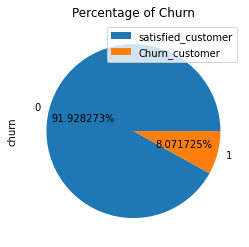

In [36]:
# Checking the % of churn in the entire dataset

data_6.churn.value_counts().plot(kind='pie', autopct='%2f%%').set_title("Percentage of Churn")
plt.legend(['satisfied_customer', 'Churn_customer'])
plt.show()

#### ----The churn column was imbalanced it was clearly shown in this pie chart

## For Catogorical column analysis with hist plot

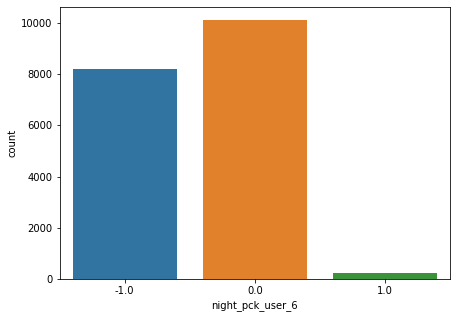

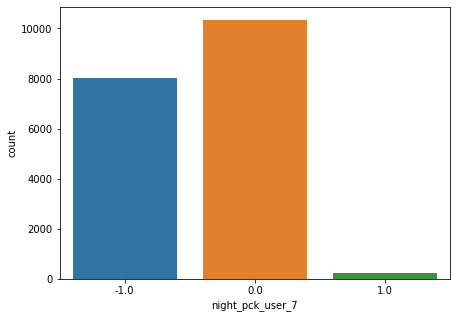

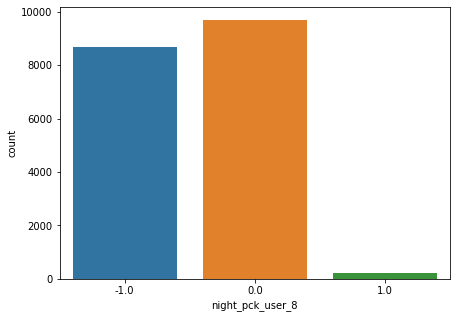

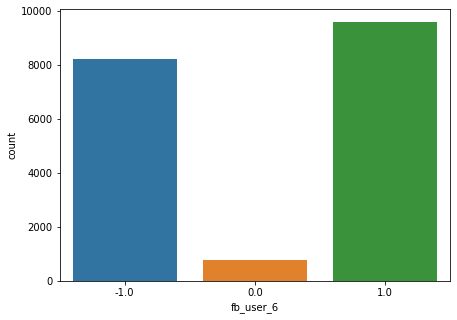

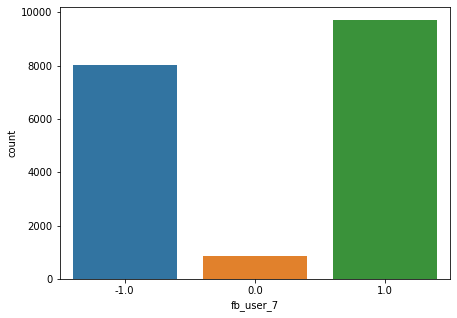

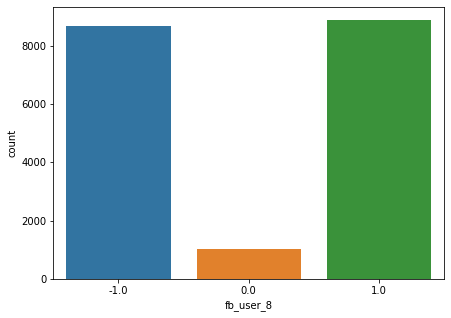

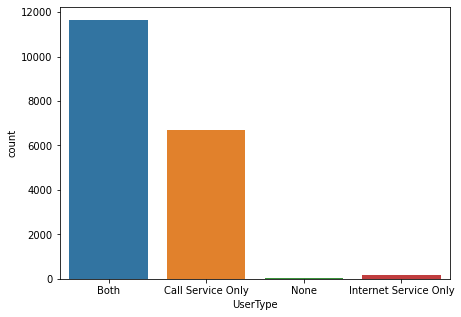

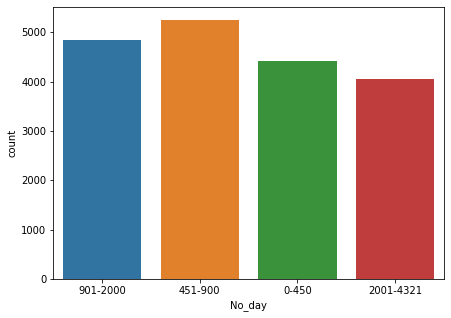

In [37]:
# Univariate Analysis on categorical columns

def histplot(x):
    for i in x:
        plt.figure(figsize= (7,5))
        sns.countplot(data_6[i])
        plt.show()
histplot(cat_cols)


### To Identify the Outliers using box plot for countinuous variables

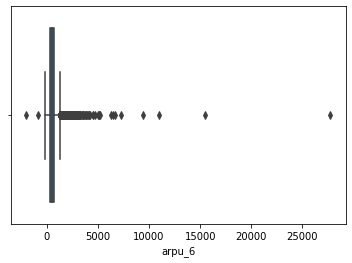

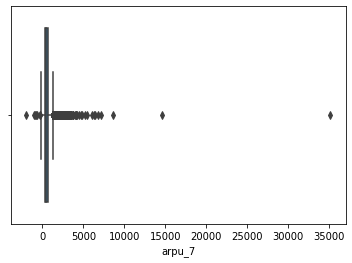

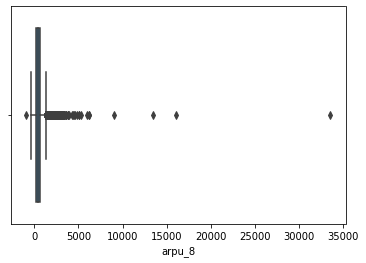

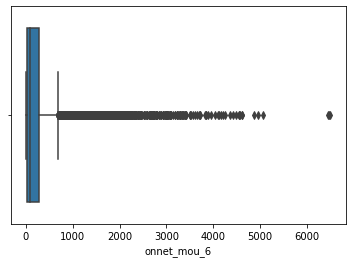

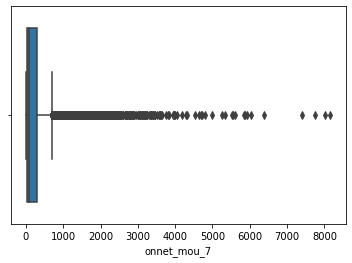

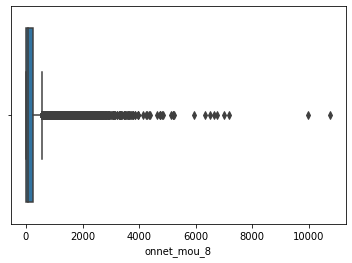

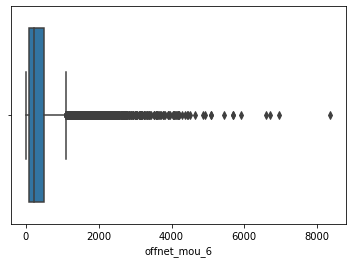

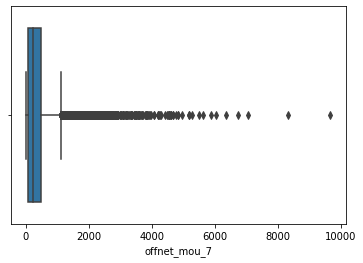

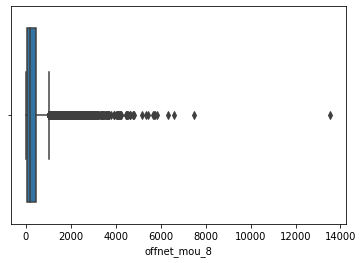

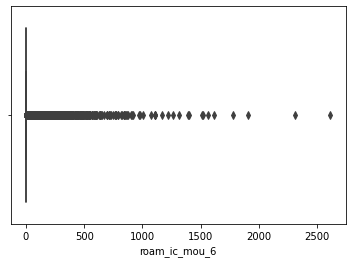

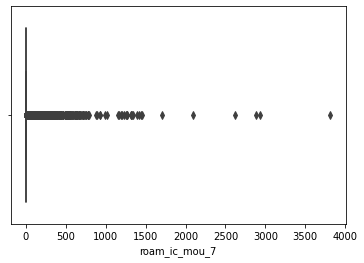

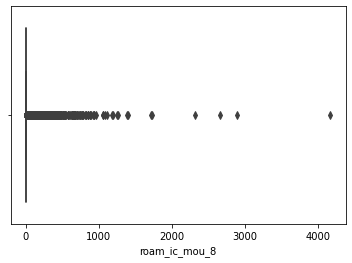

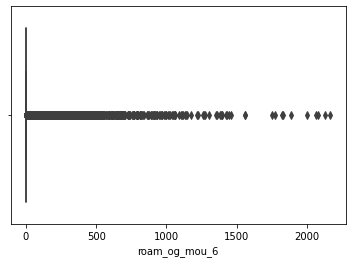

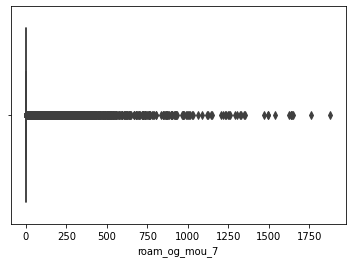

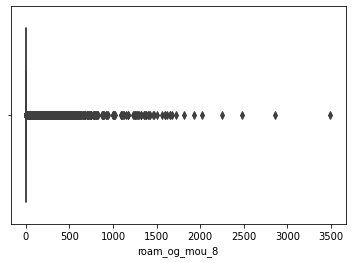

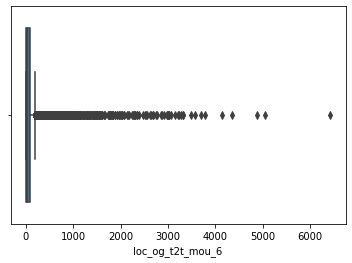

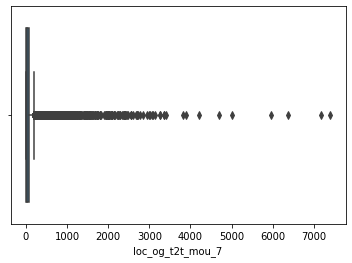

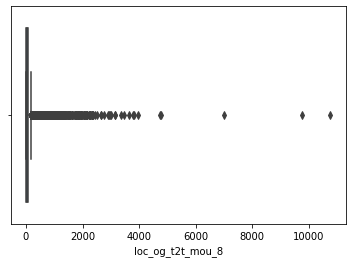

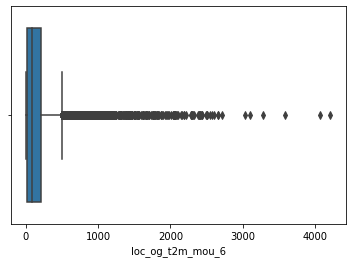

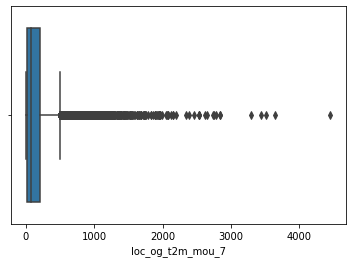

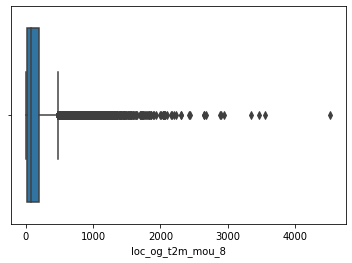

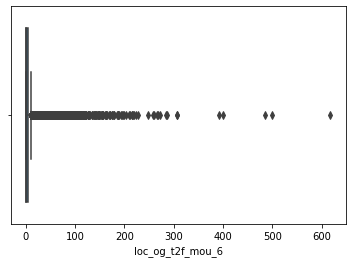

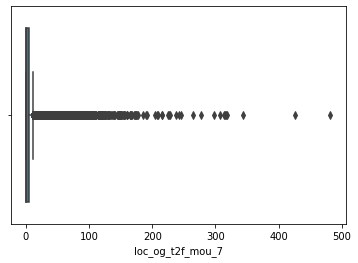

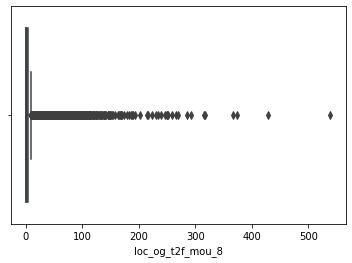

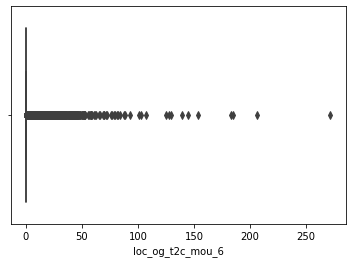

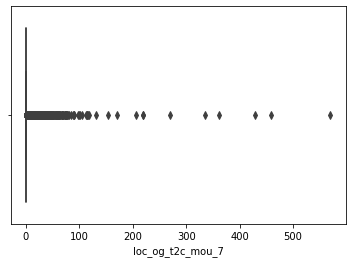

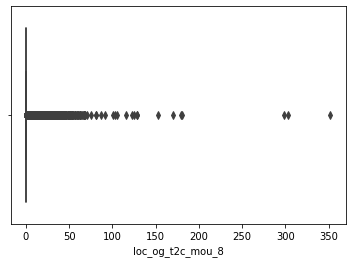

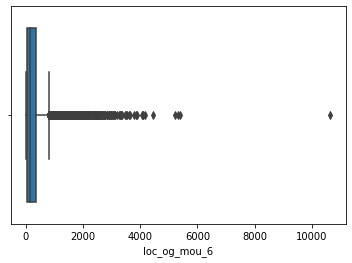

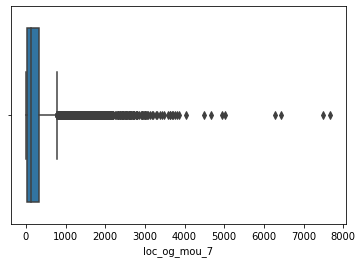

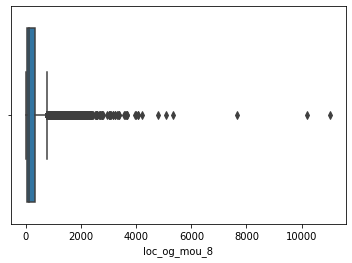

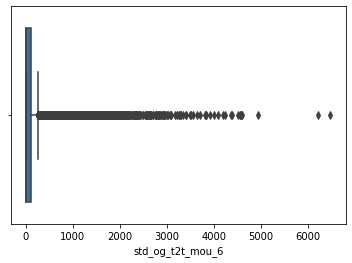

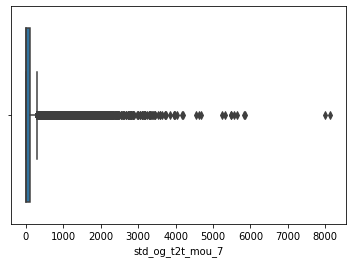

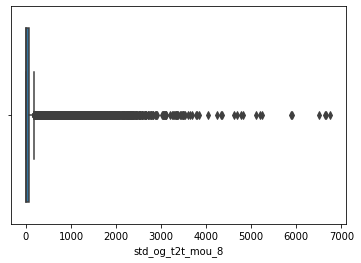

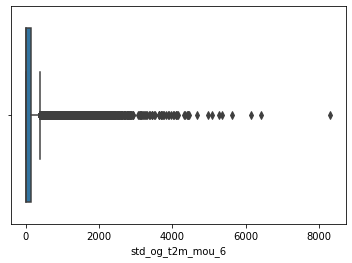

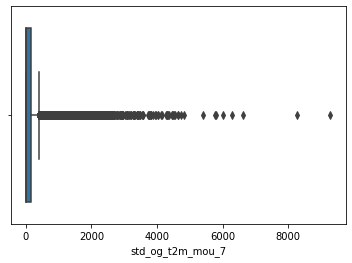

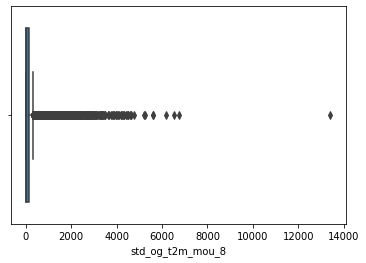

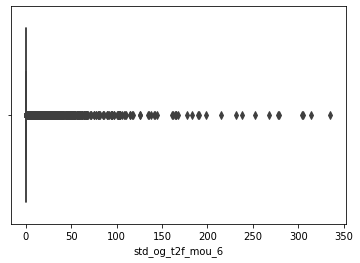

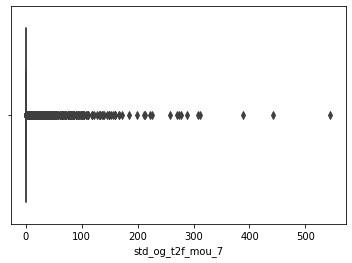

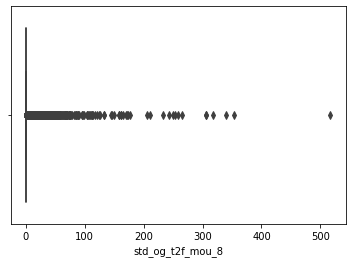

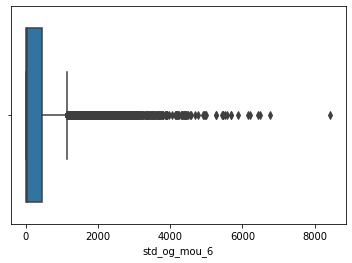

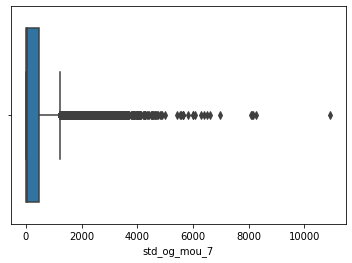

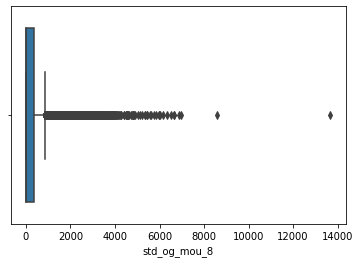

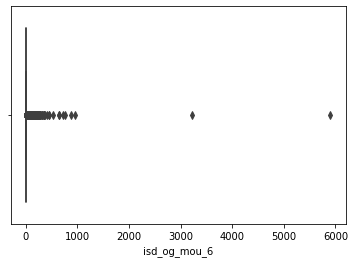

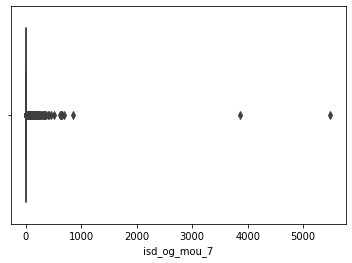

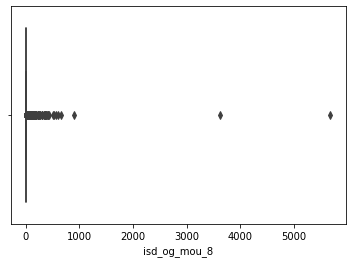

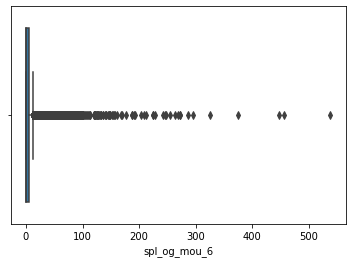

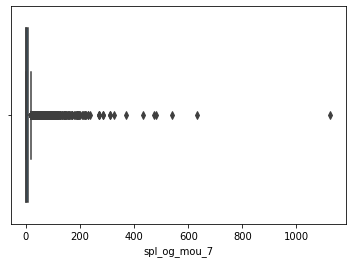

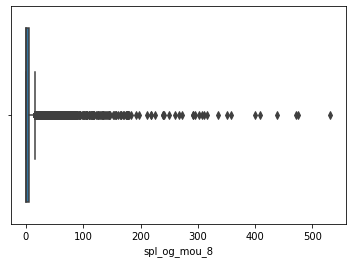

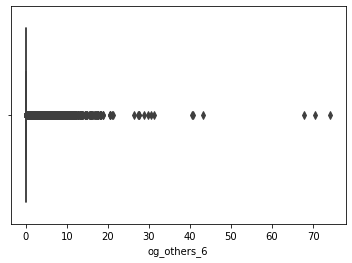

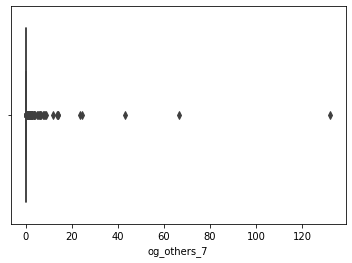

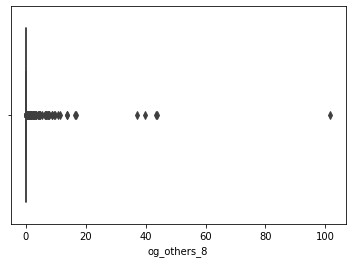

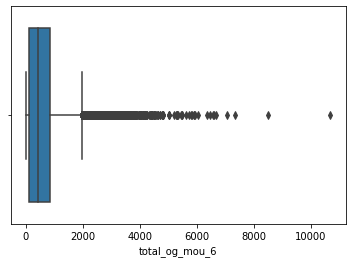

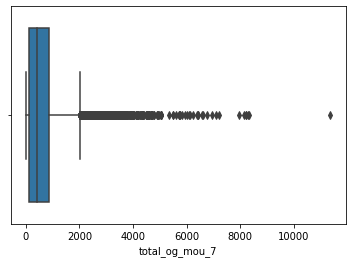

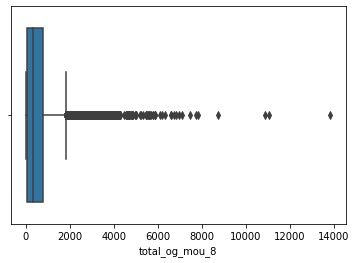

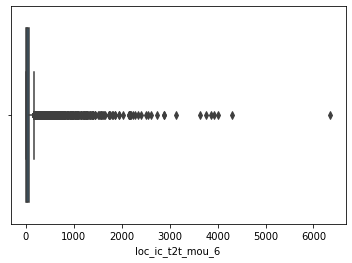

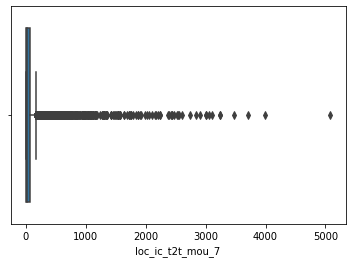

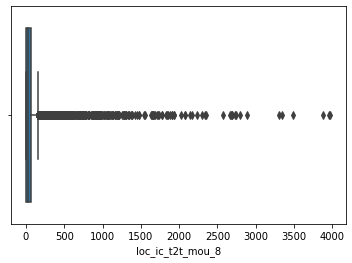

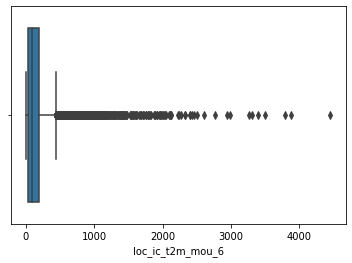

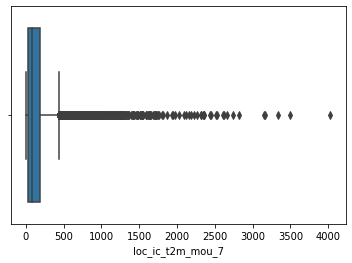

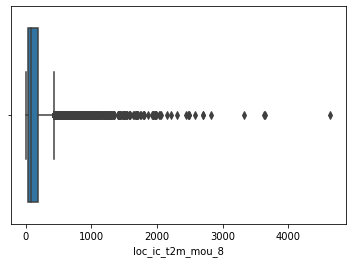

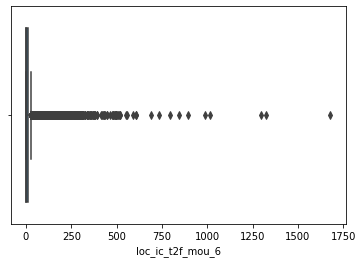

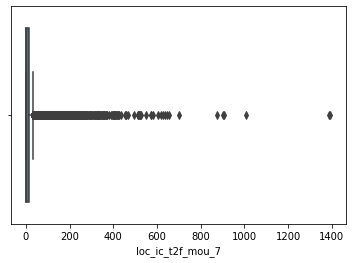

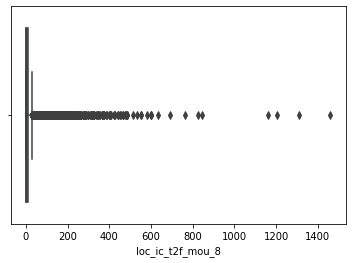

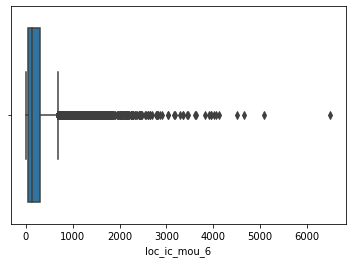

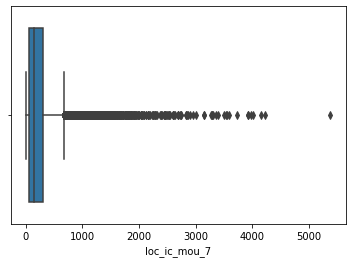

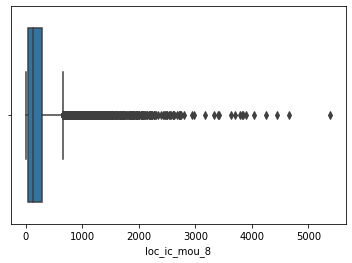

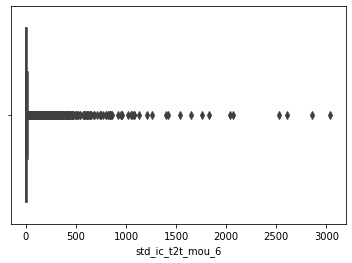

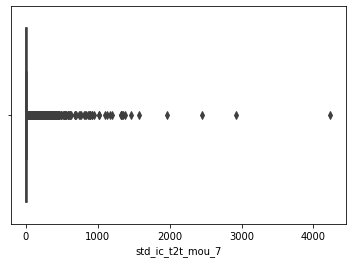

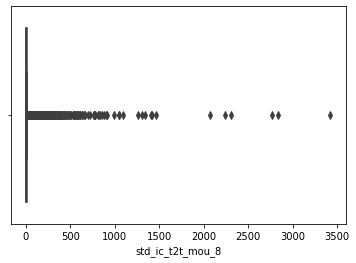

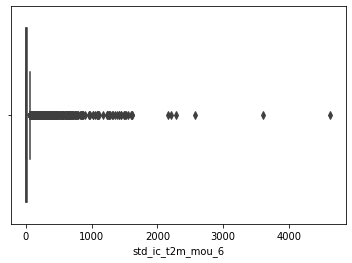

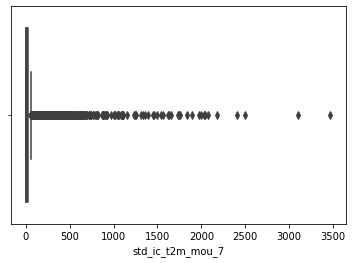

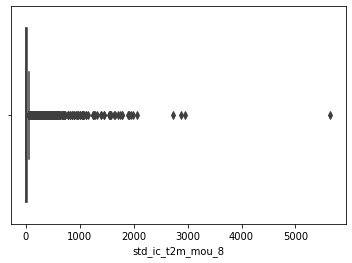

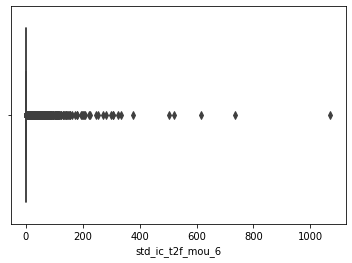

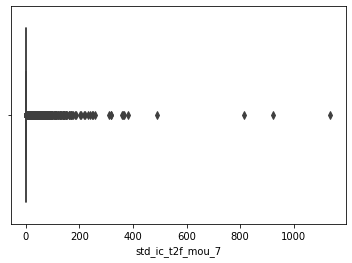

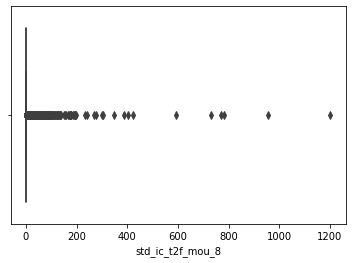

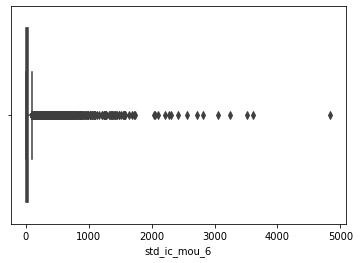

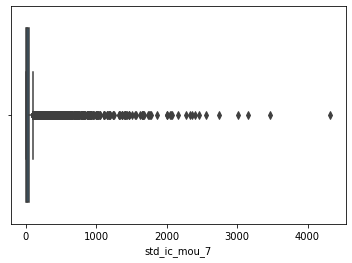

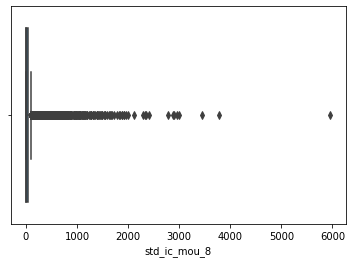

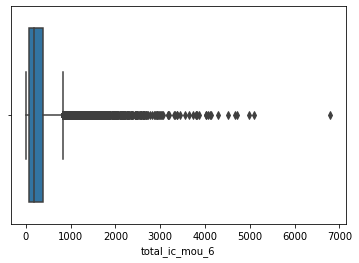

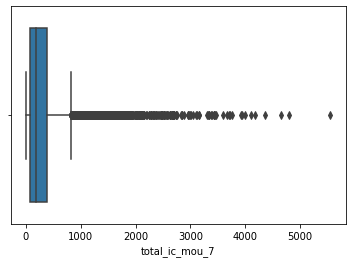

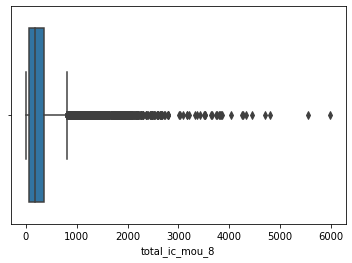

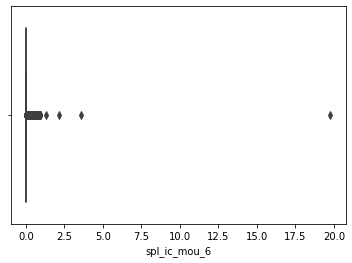

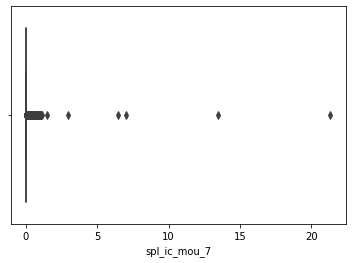

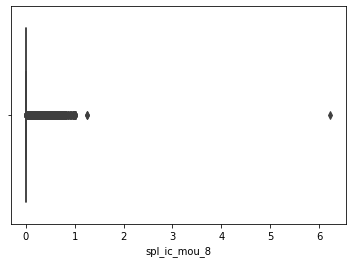

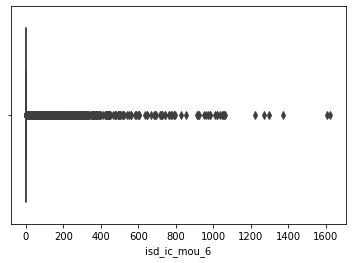

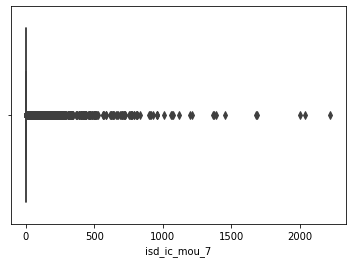

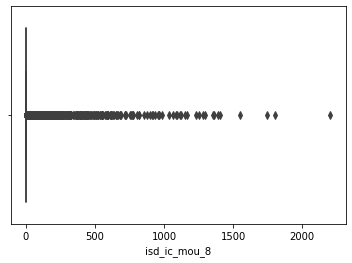

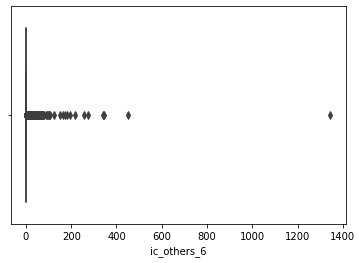

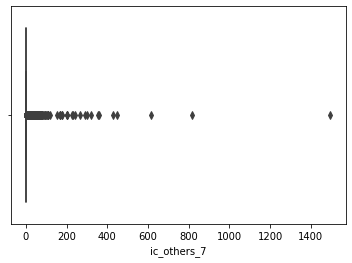

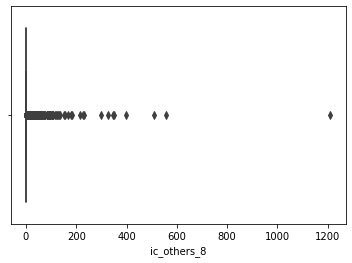

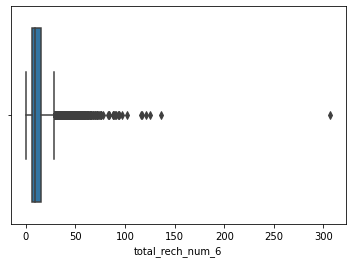

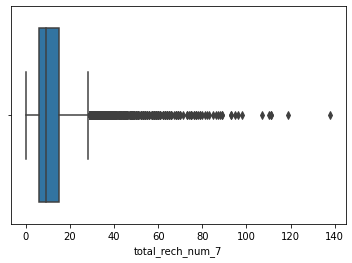

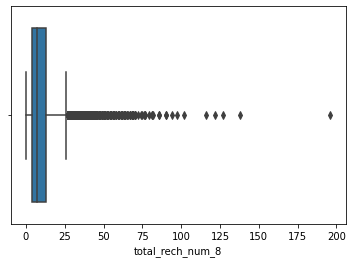

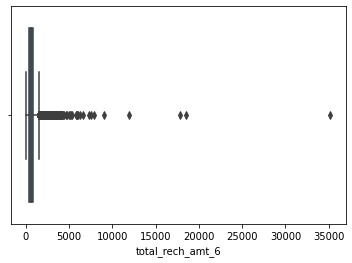

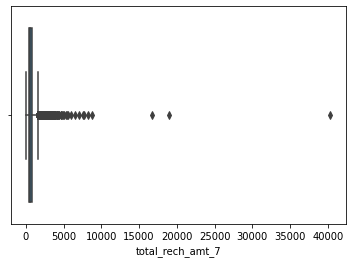

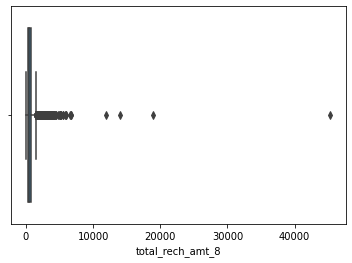

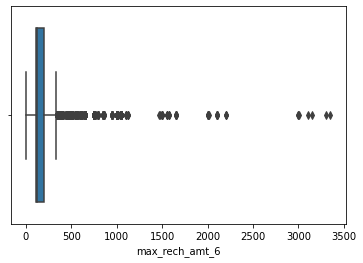

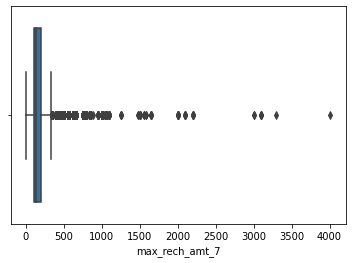

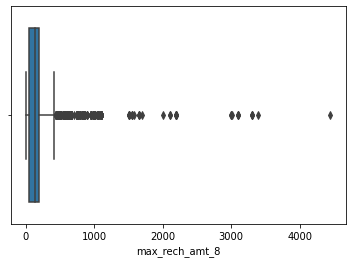

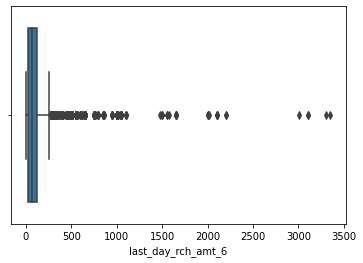

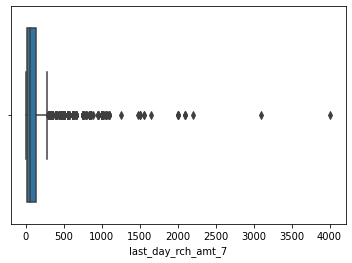

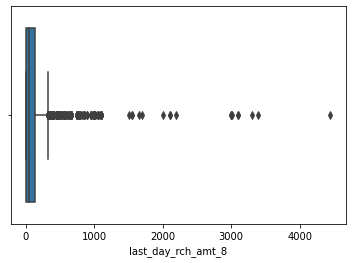

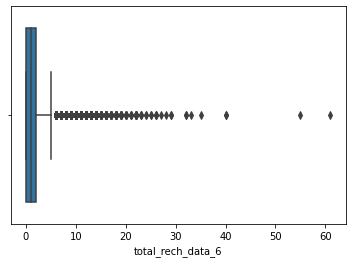

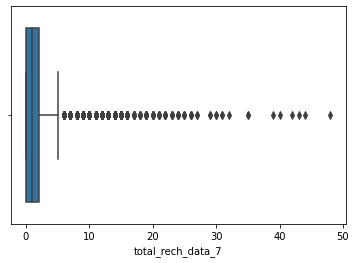

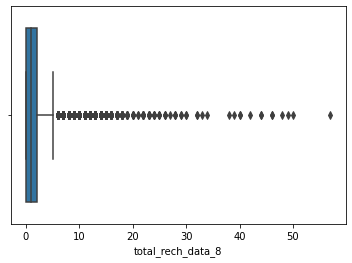

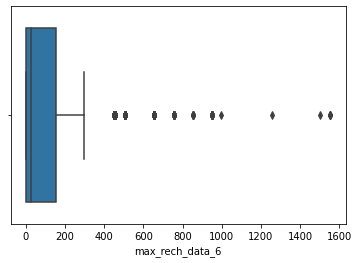

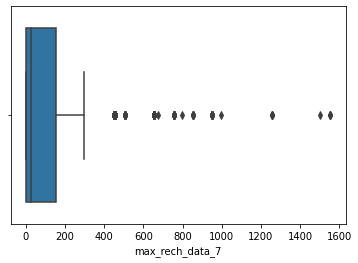

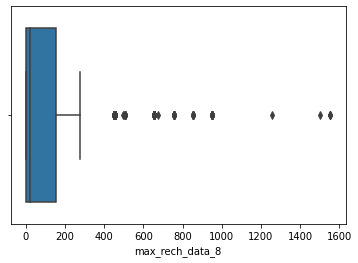

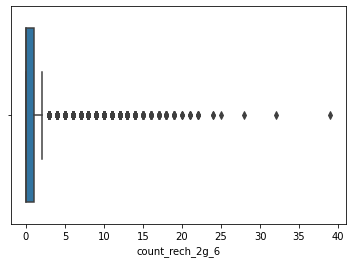

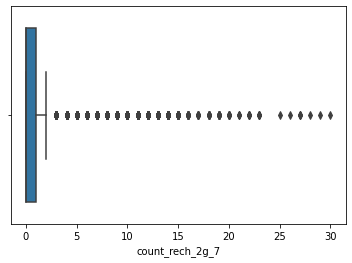

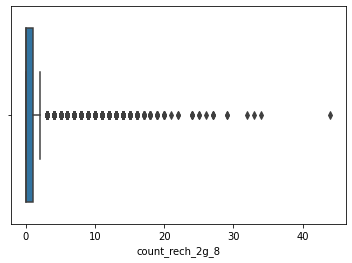

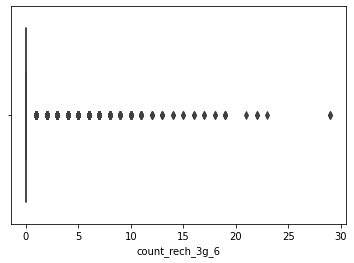

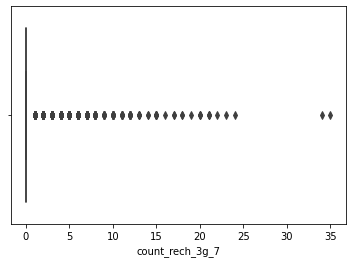

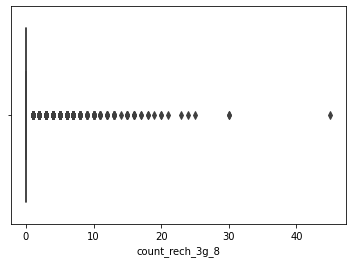

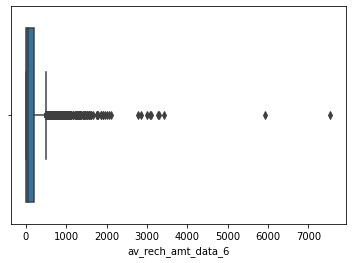

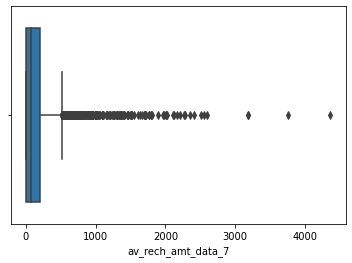

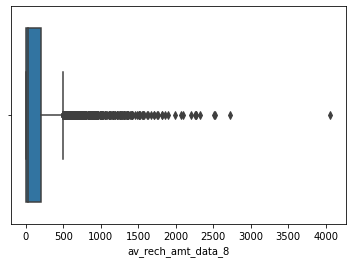

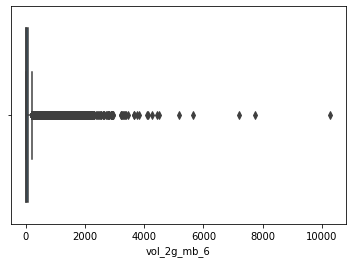

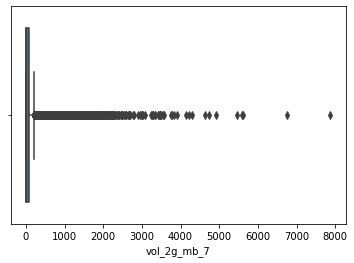

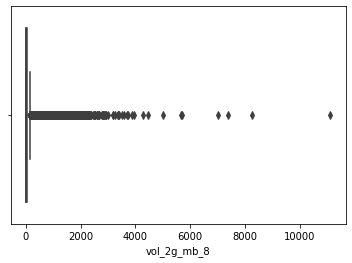

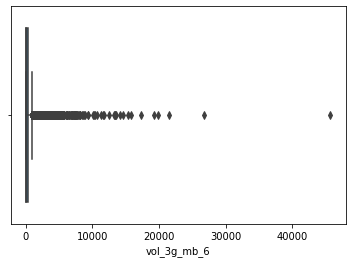

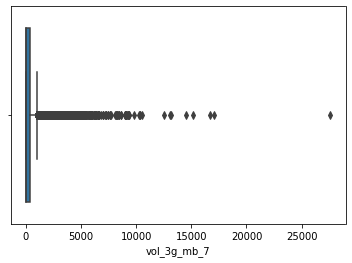

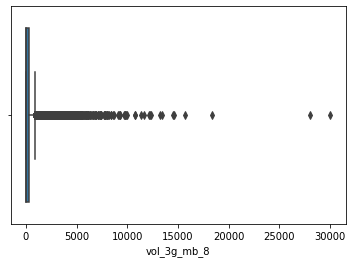

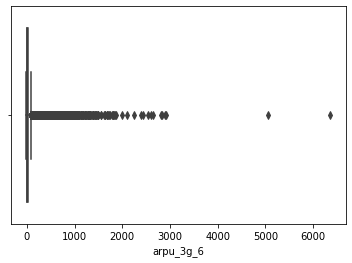

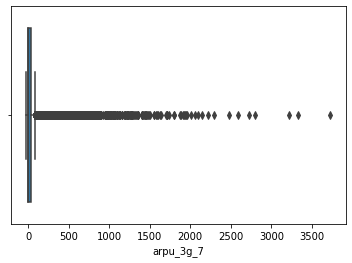

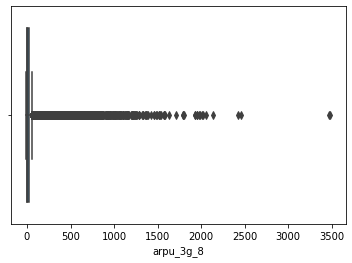

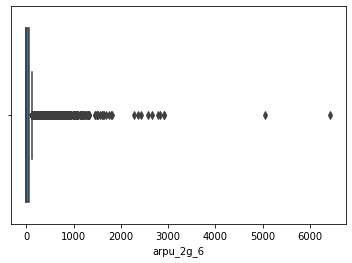

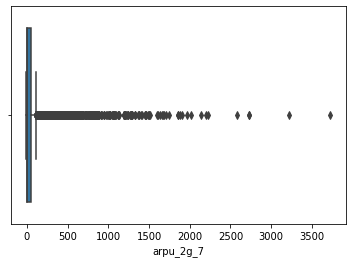

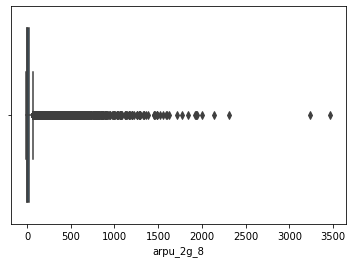

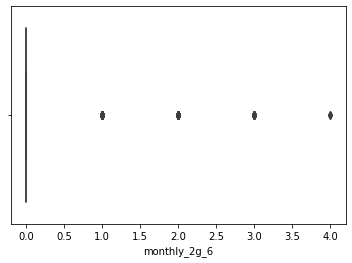

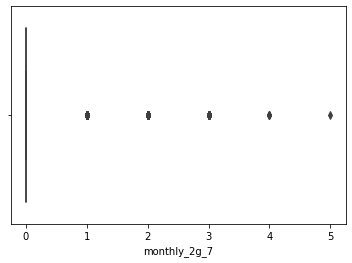

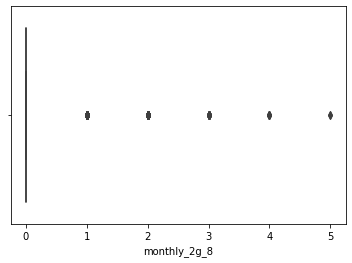

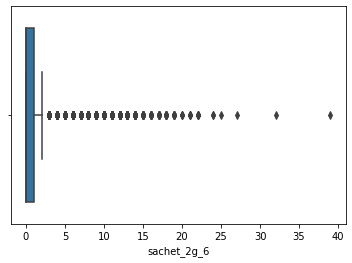

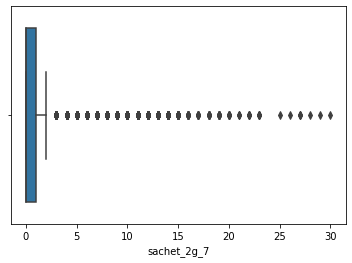

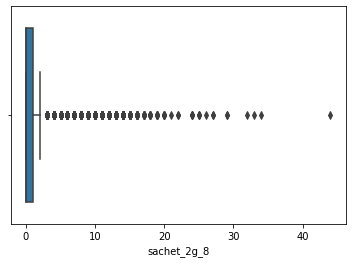

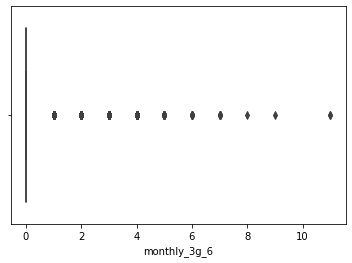

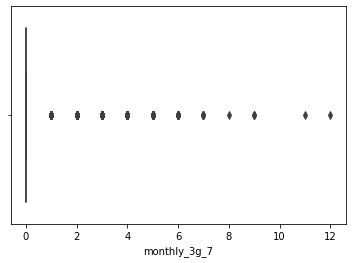

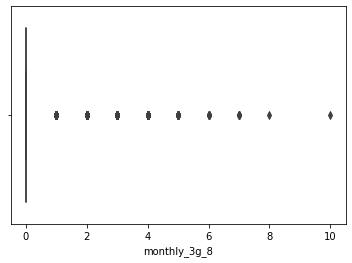

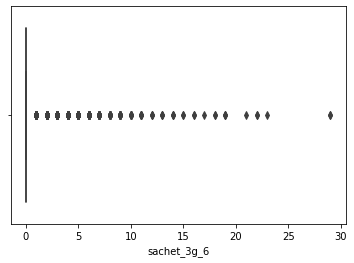

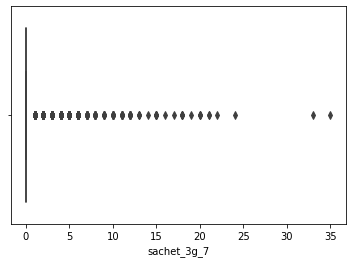

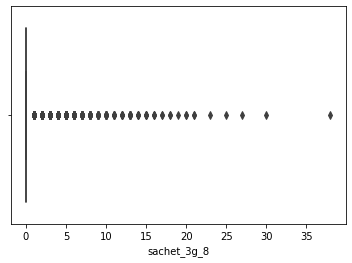

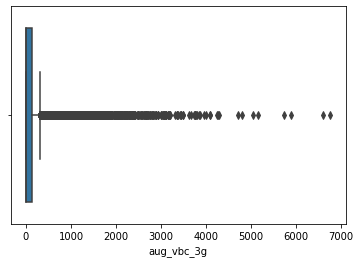

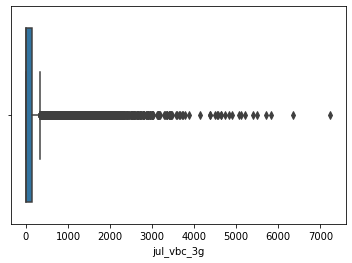

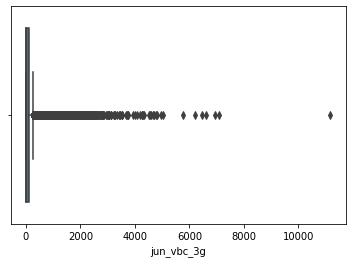

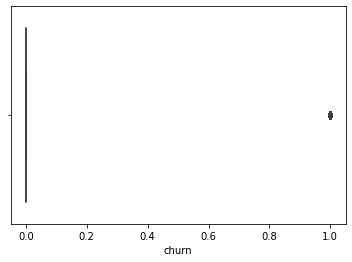

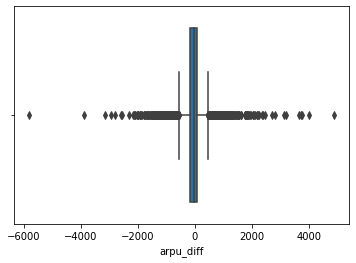

In [38]:
# Creating Univariate boxplots from continuous variables

def boxplot(x):
    for i in x:
        sns.boxplot(data_6[i])
        plt.show()
boxplot(num_cols)

#### All the columns have high outliers based on the plots and we need to do the outlier treatment of the numerical columns

### 3.4.2 Bivariate Analysis

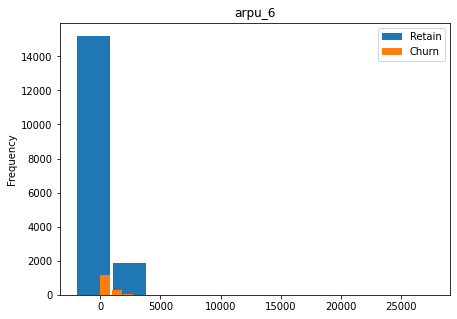

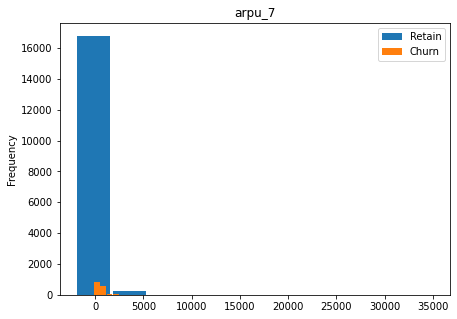

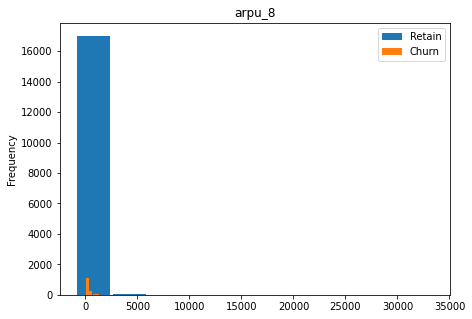

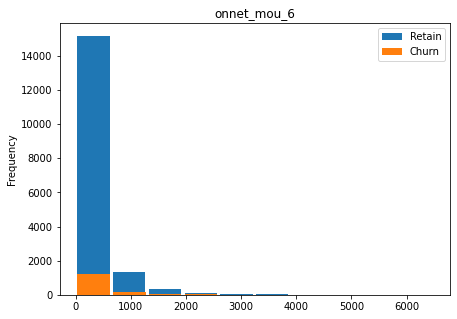

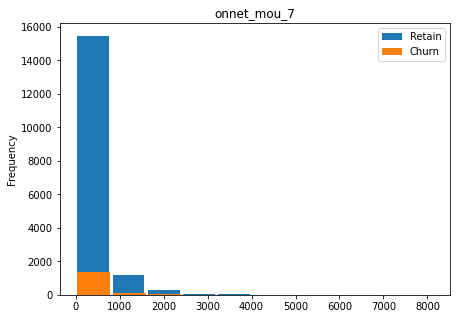

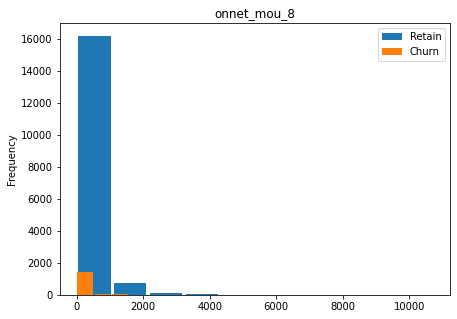

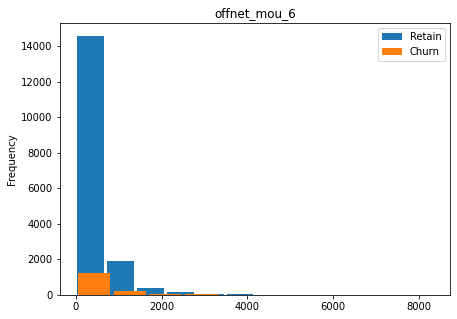

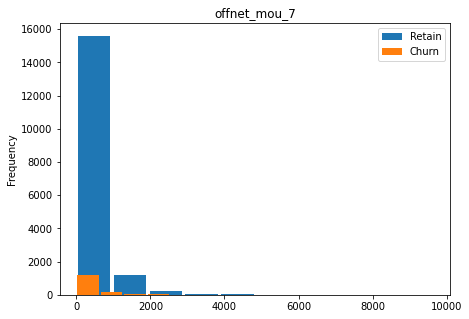

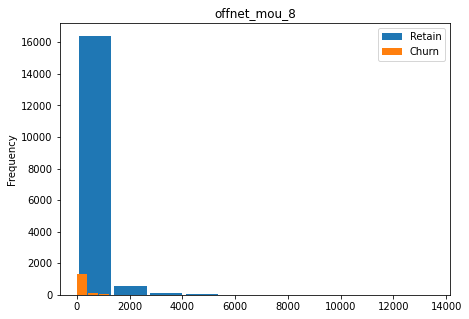

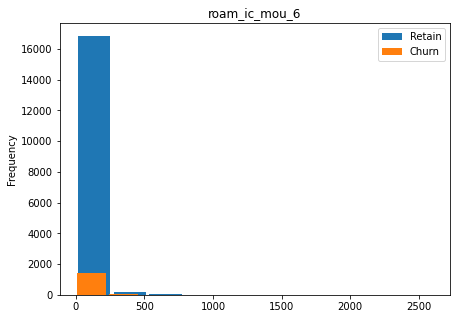

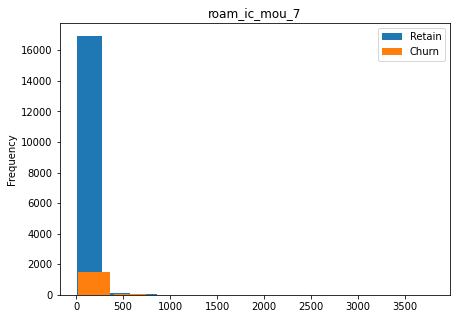

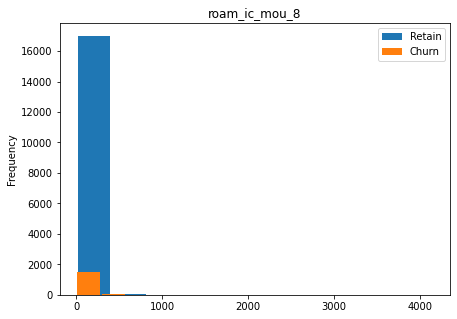

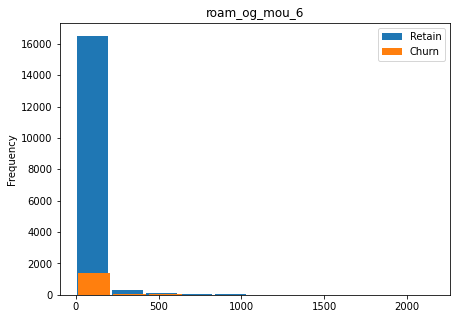

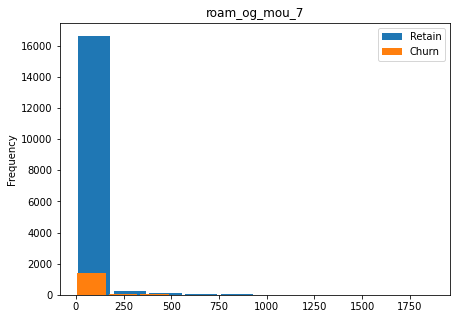

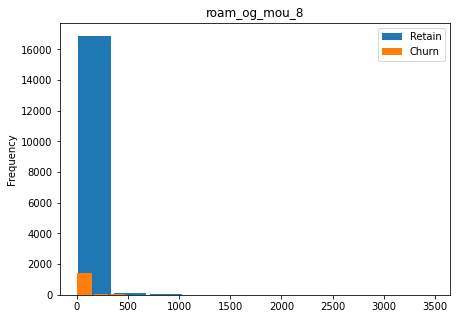

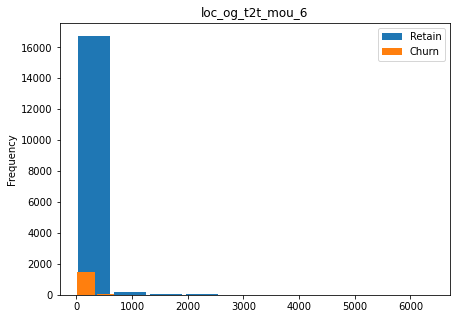

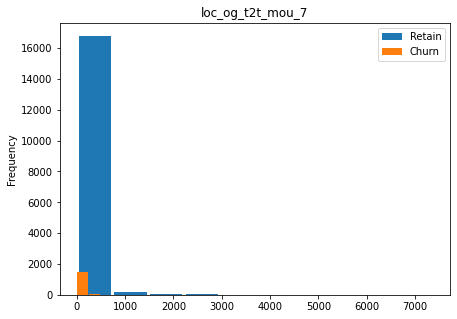

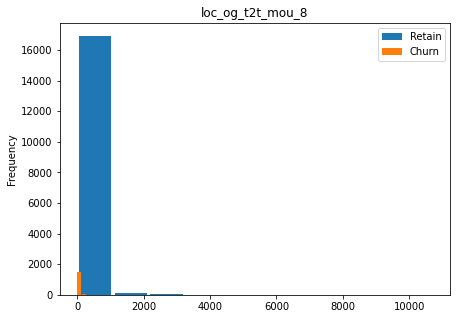

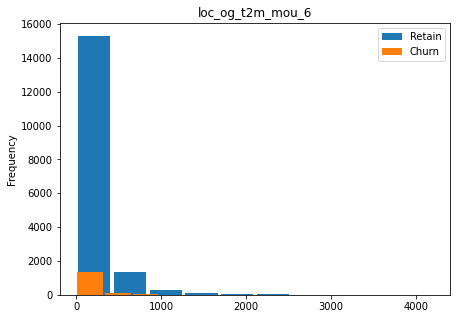

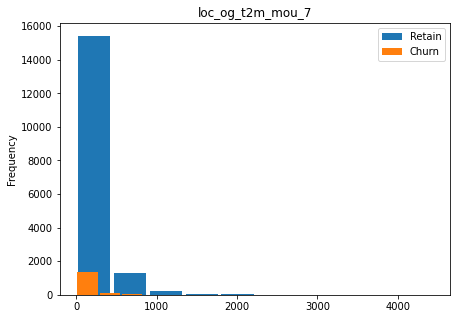

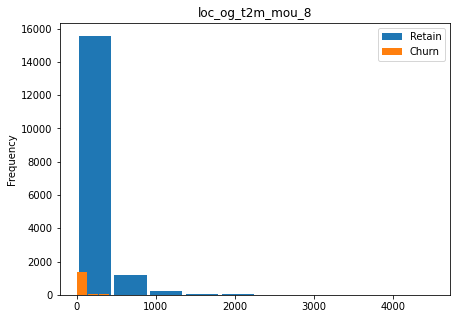

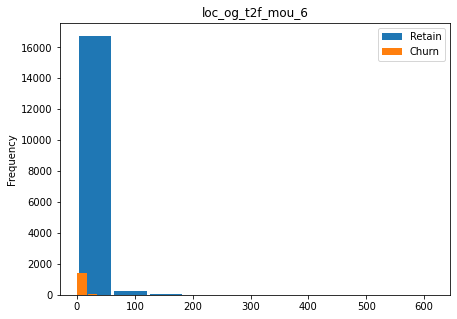

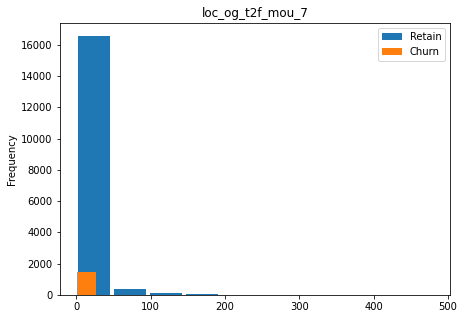

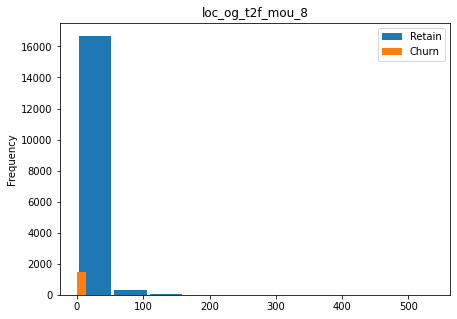

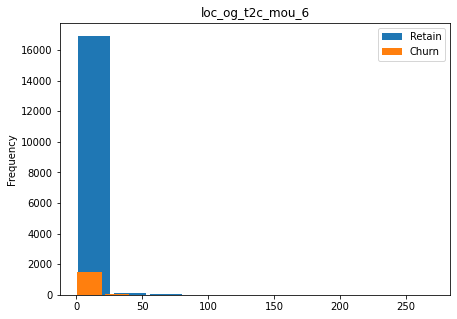

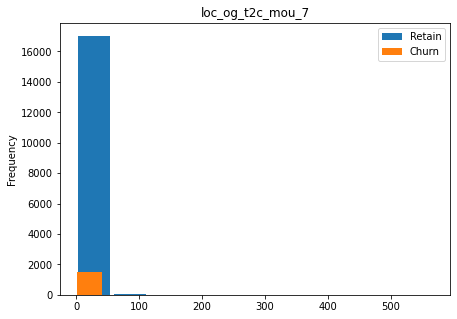

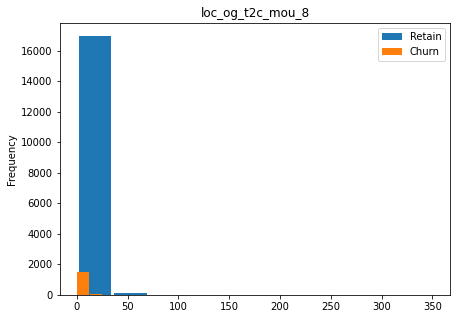

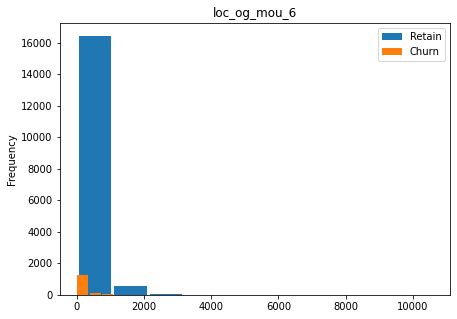

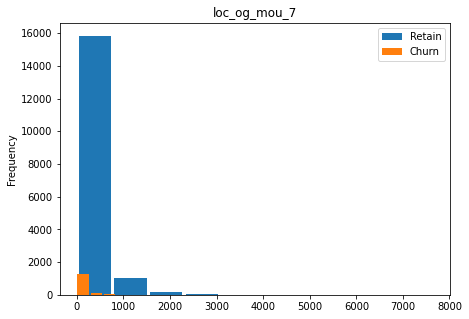

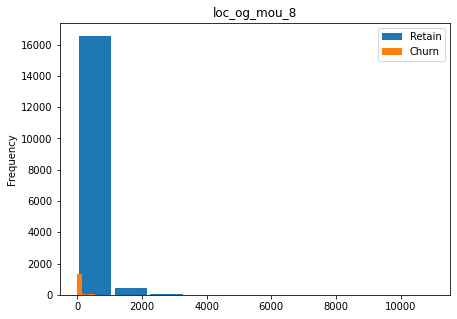

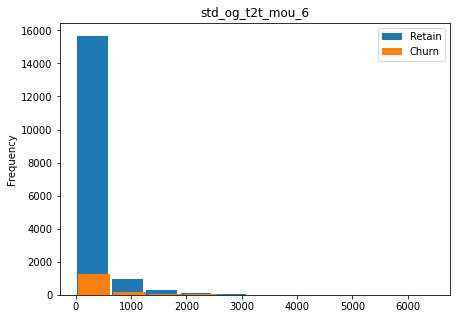

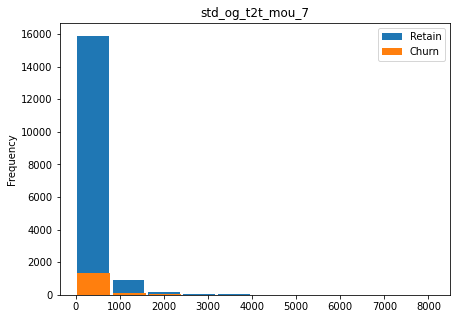

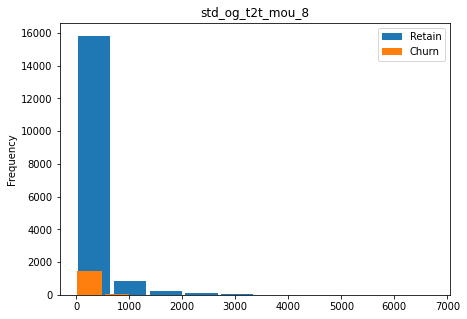

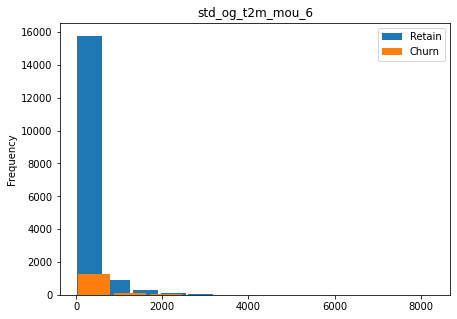

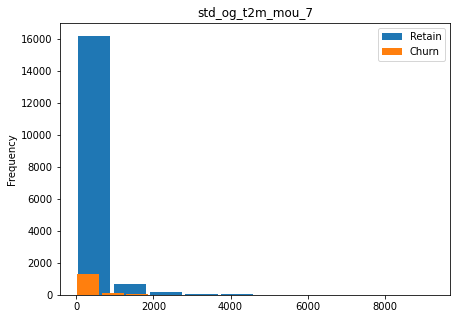

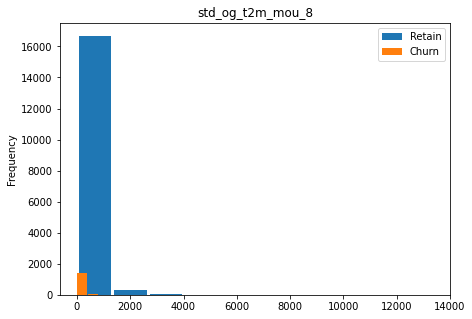

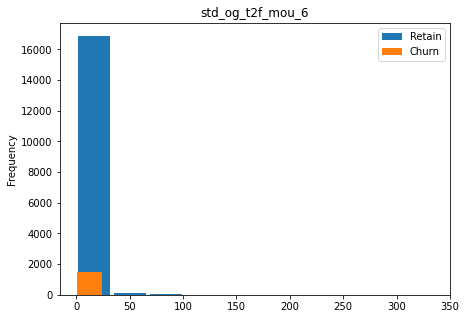

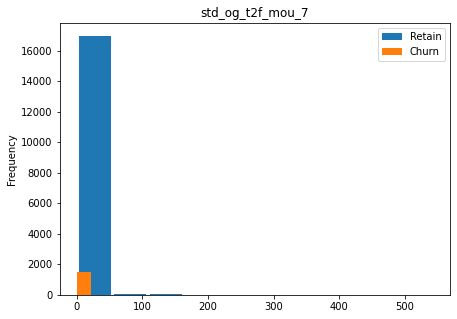

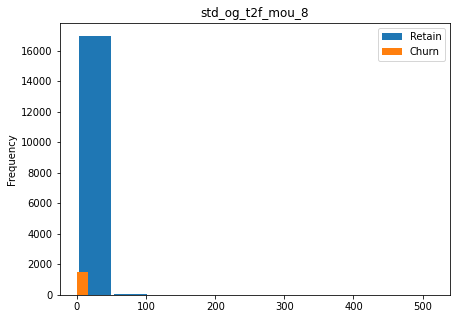

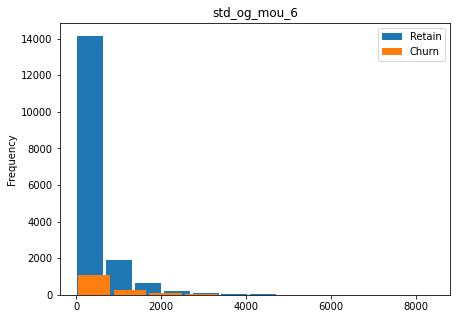

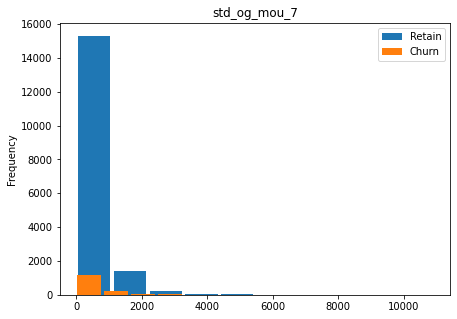

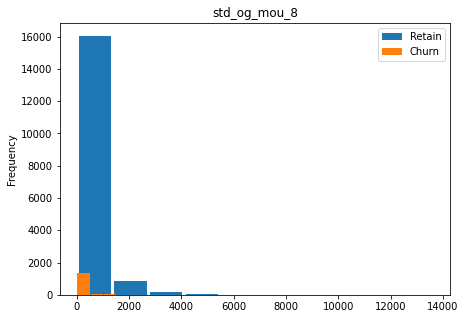

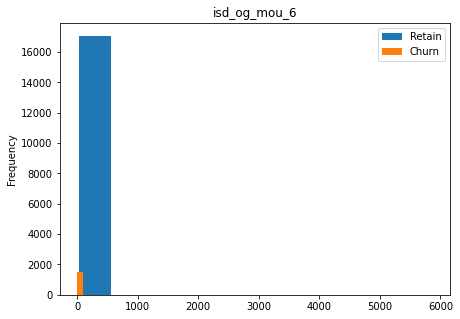

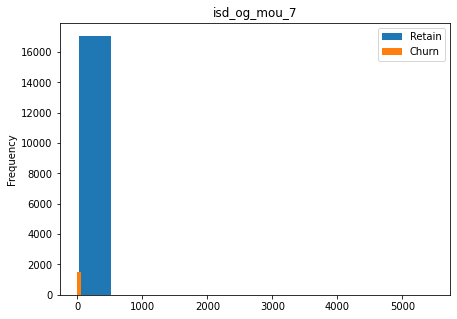

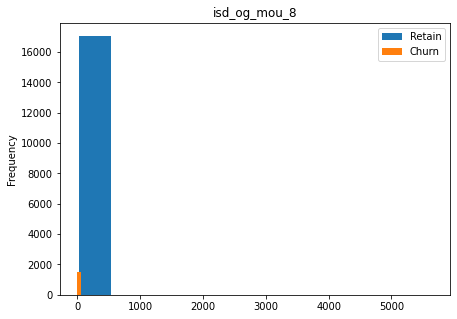

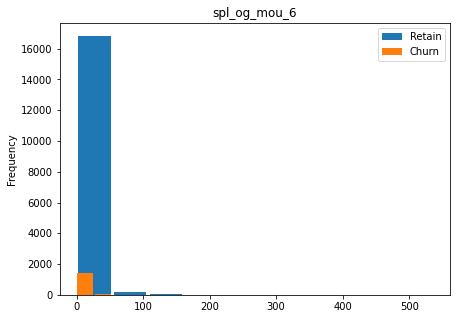

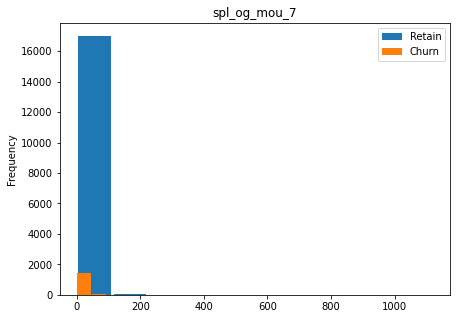

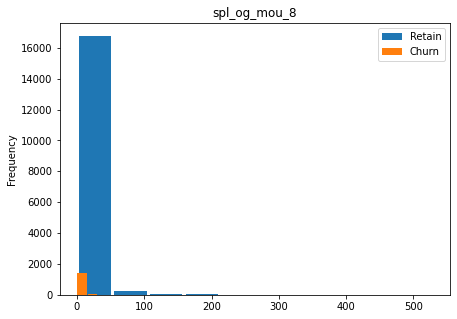

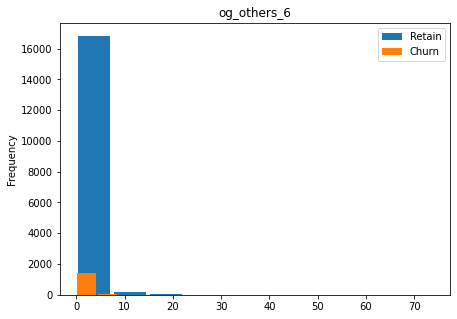

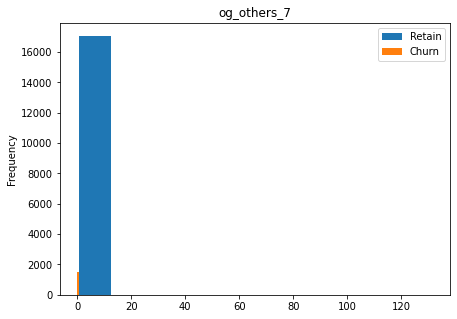

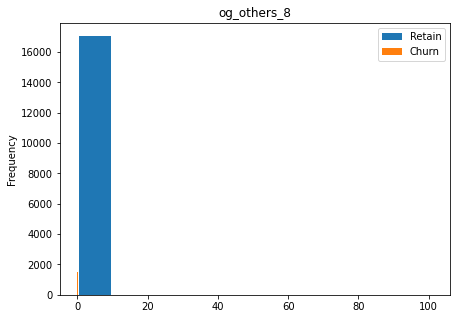

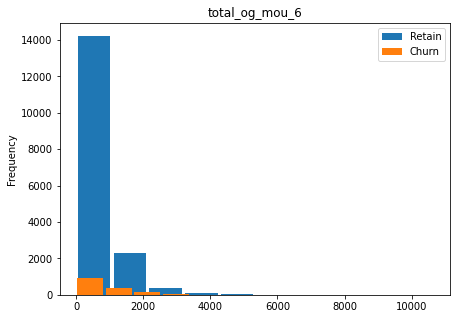

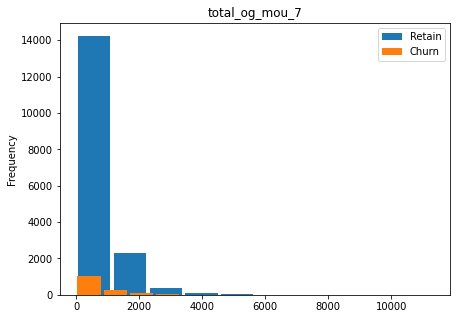

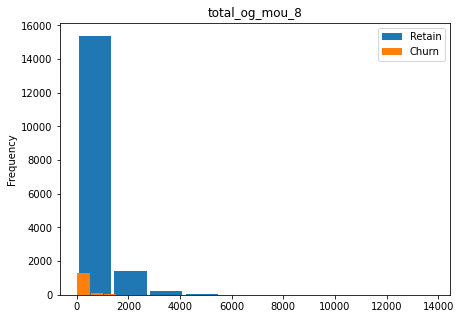

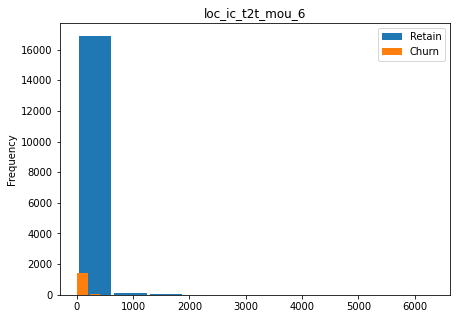

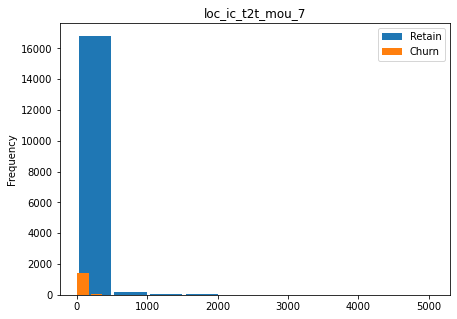

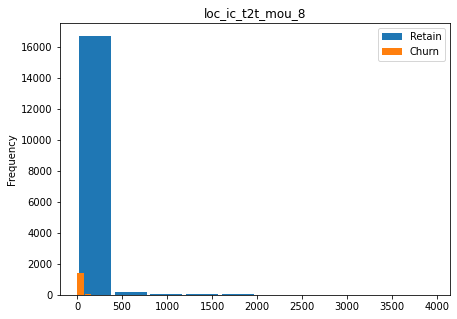

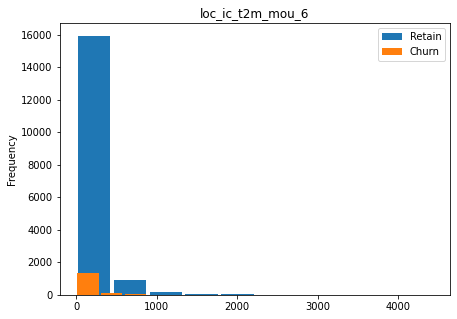

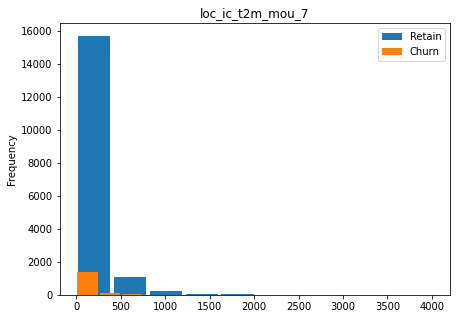

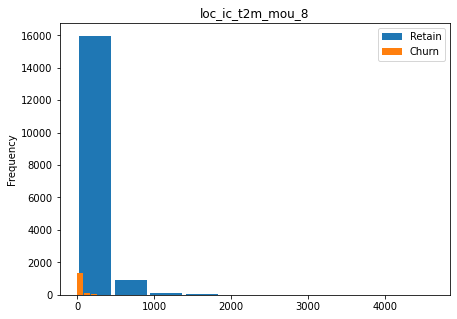

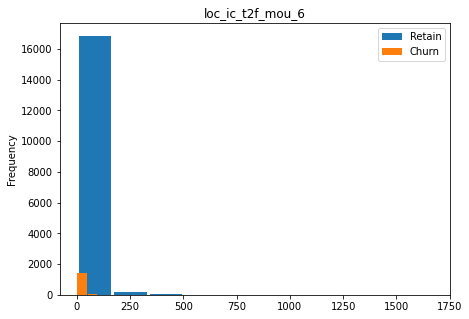

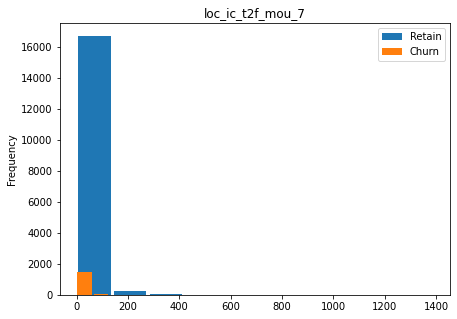

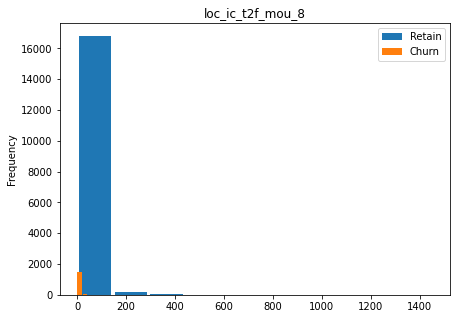

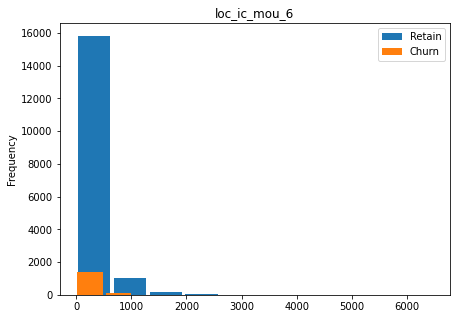

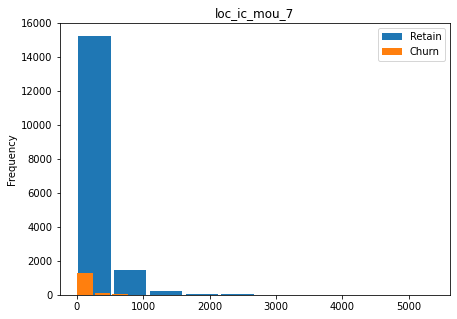

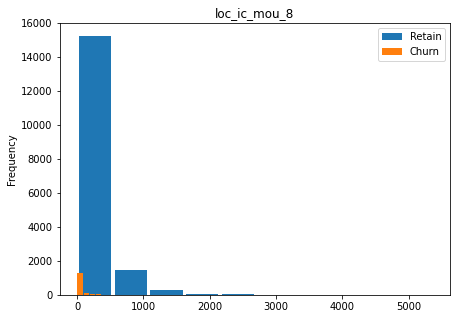

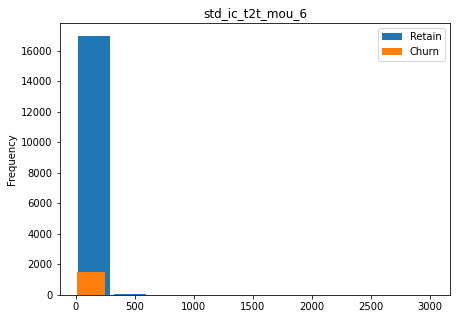

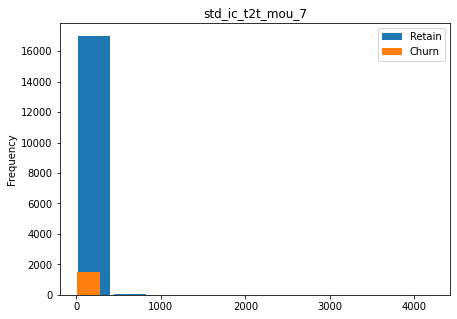

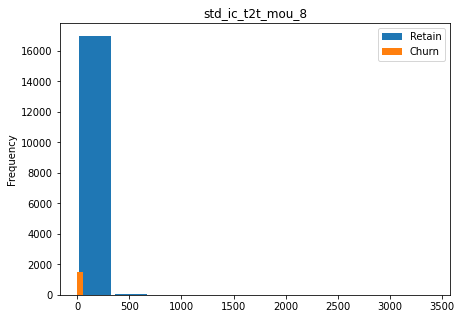

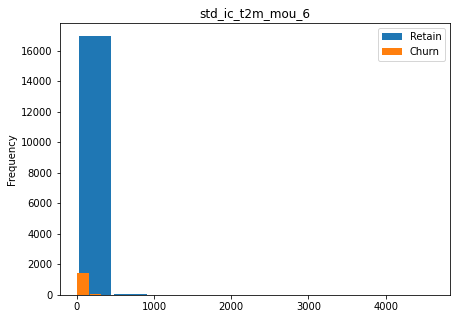

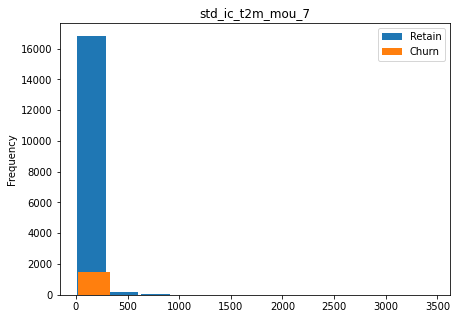

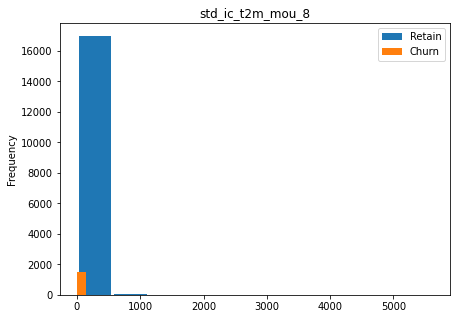

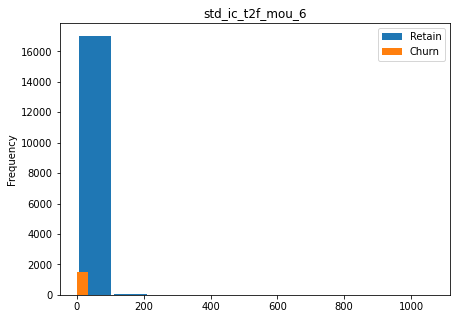

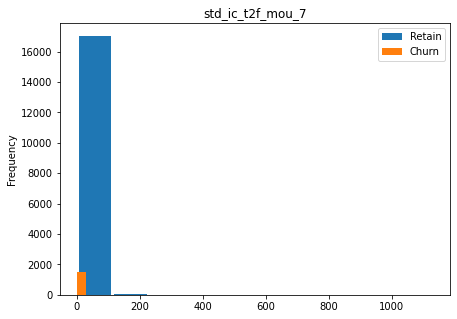

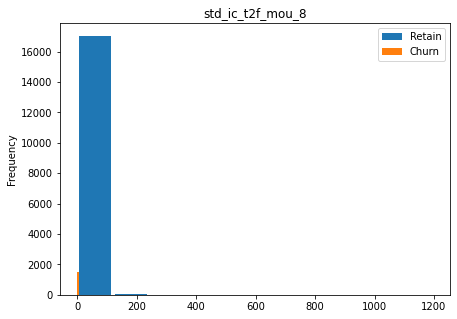

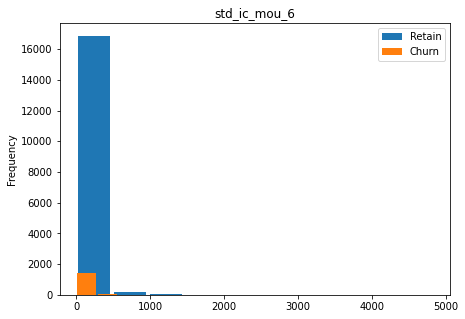

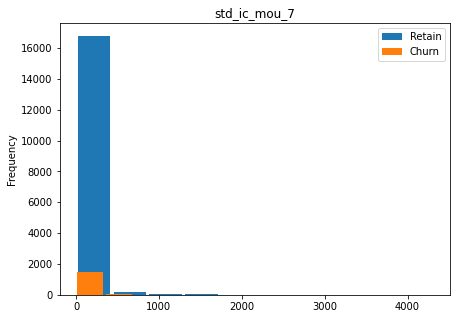

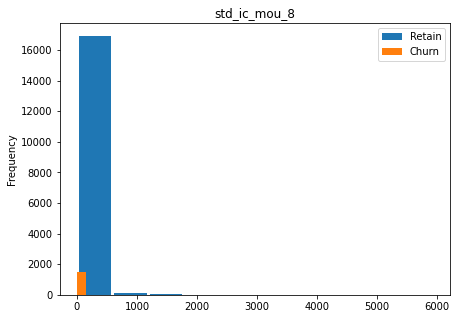

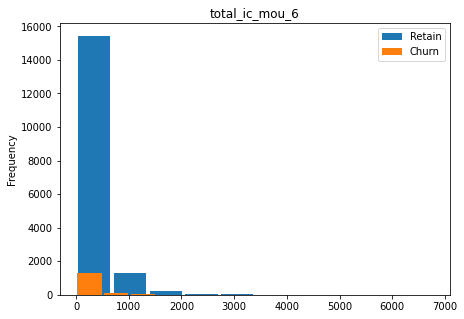

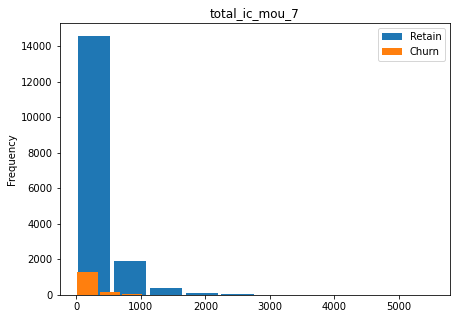

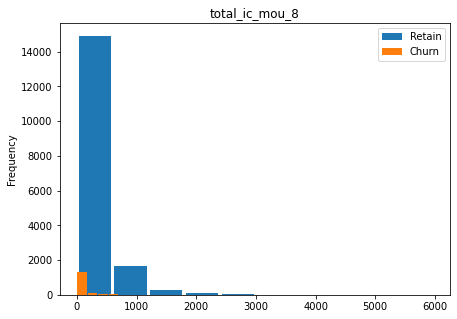

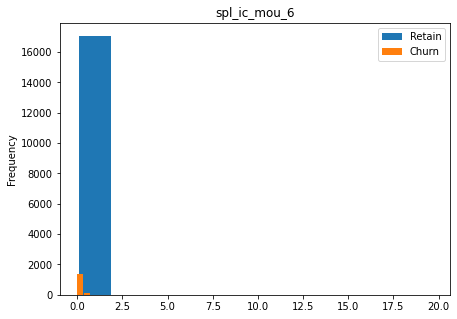

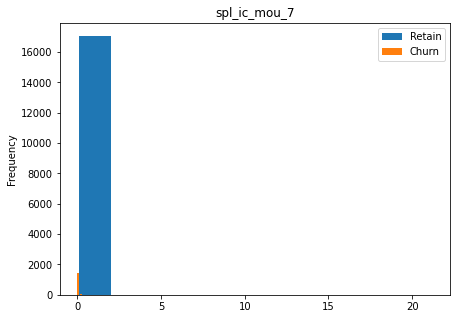

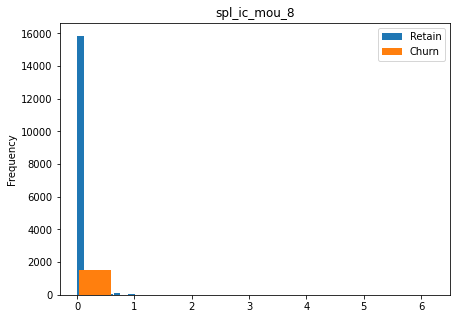

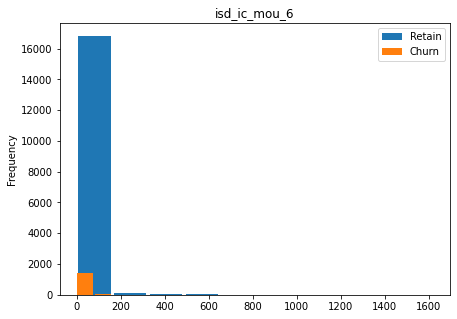

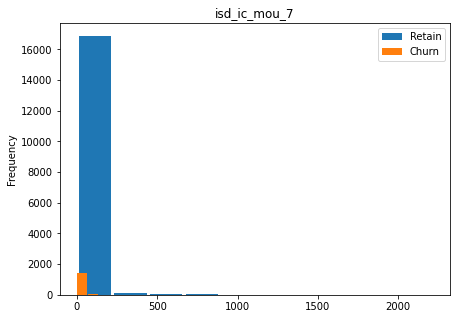

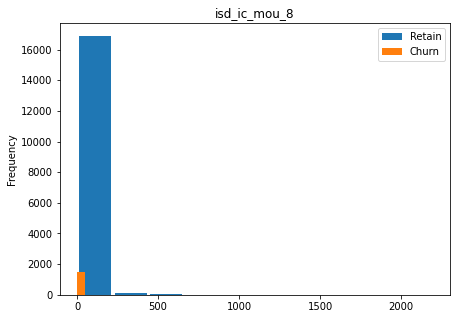

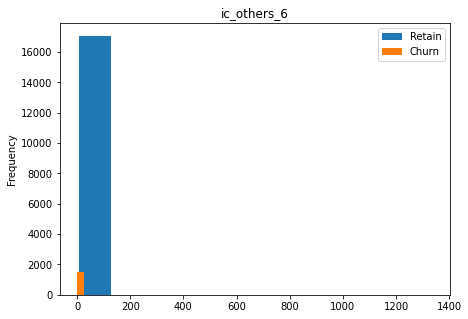

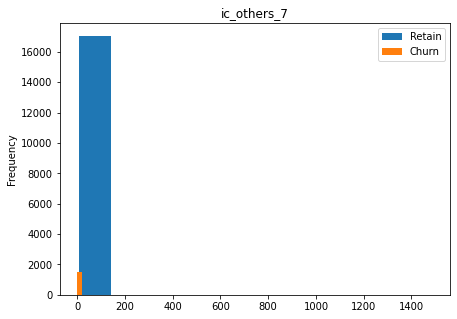

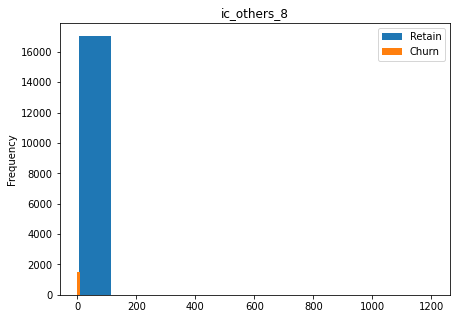

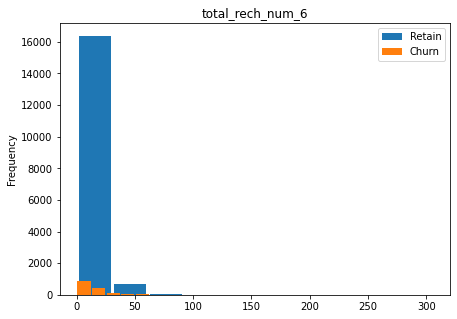

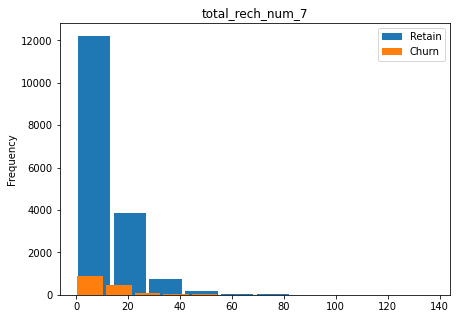

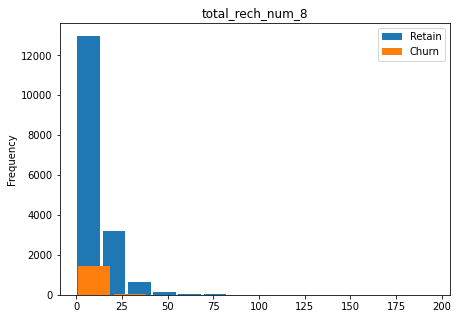

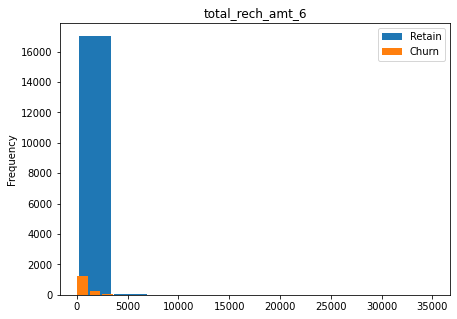

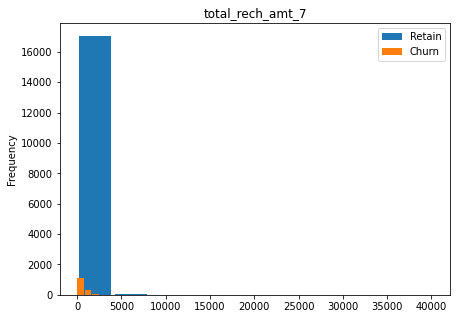

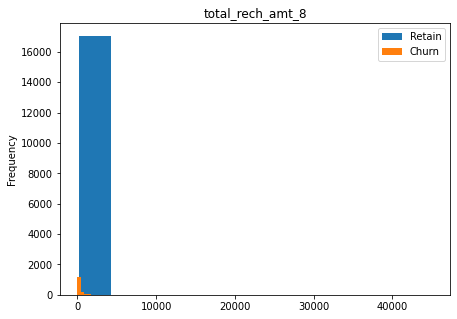

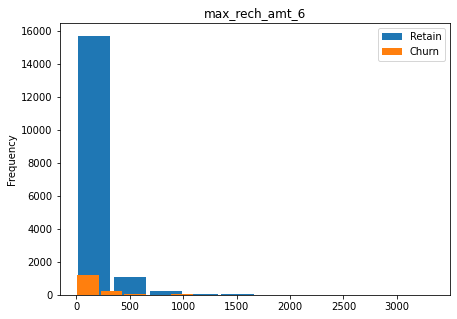

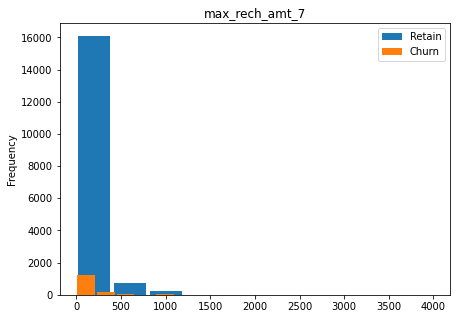

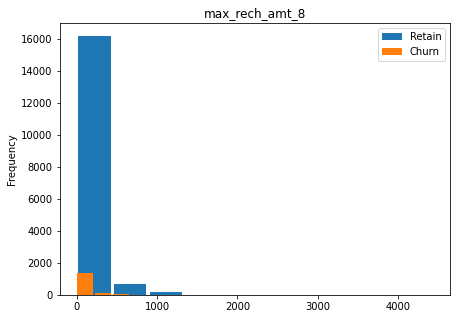

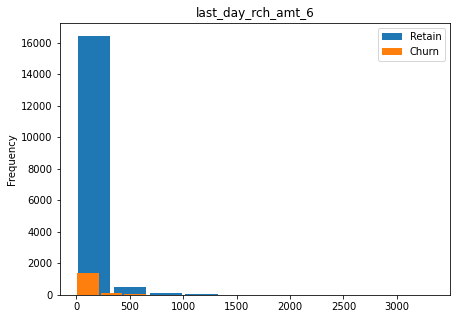

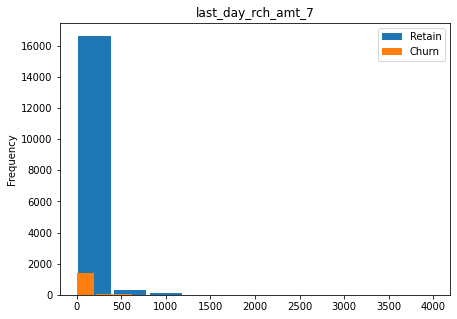

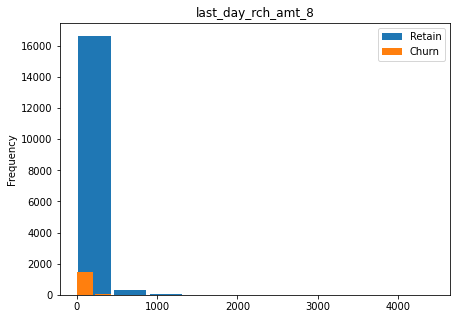

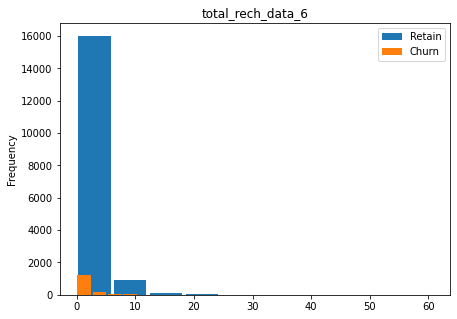

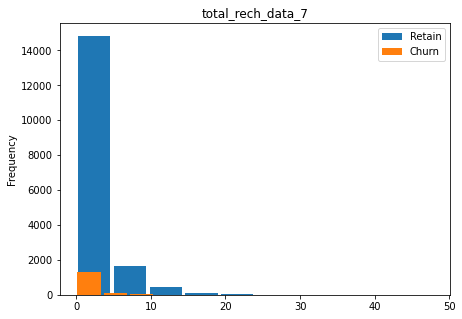

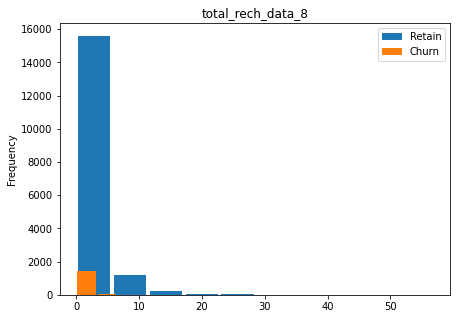

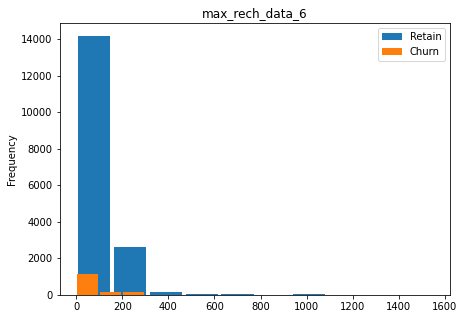

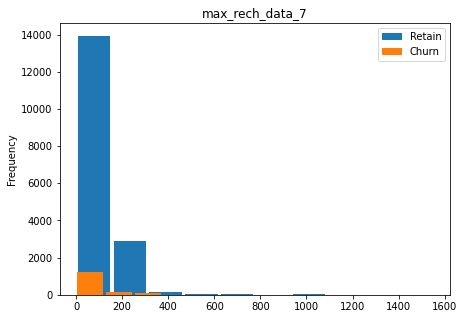

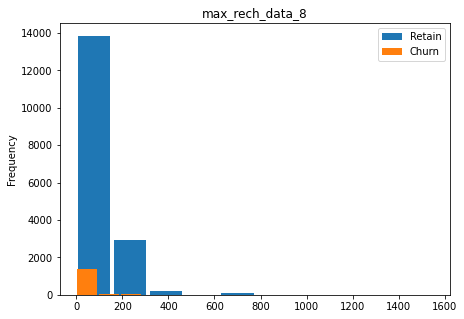

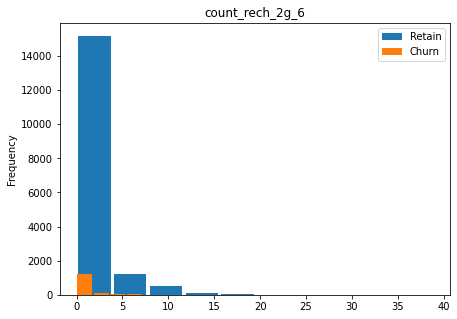

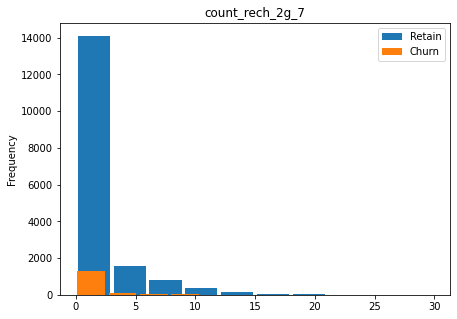

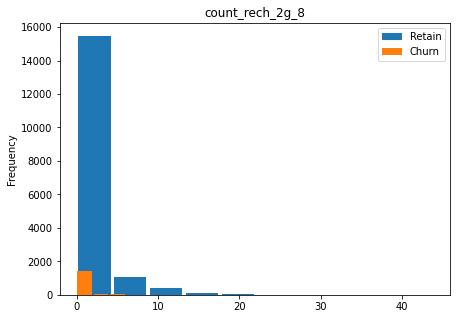

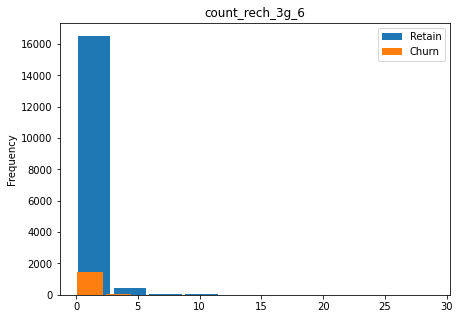

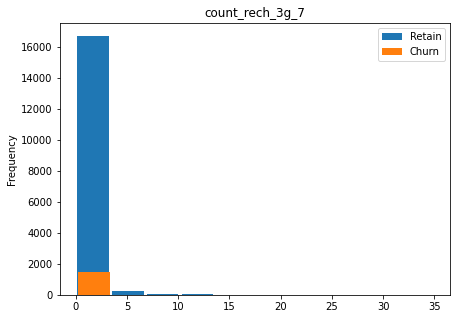

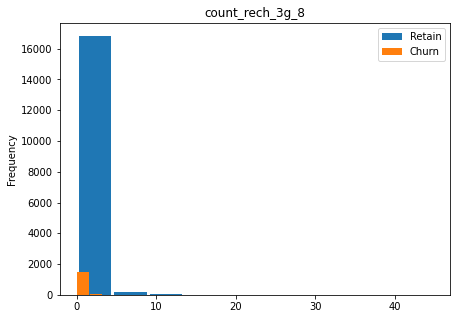

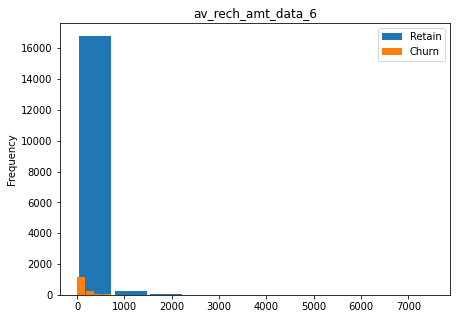

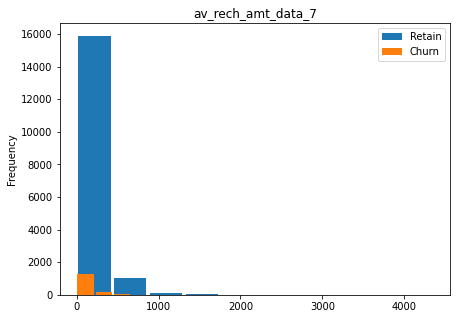

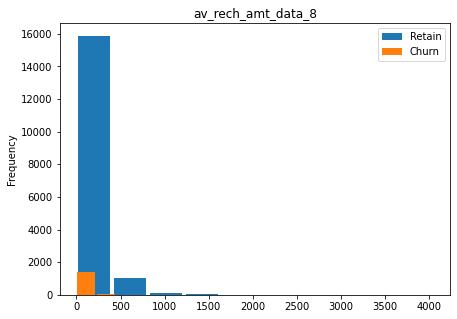

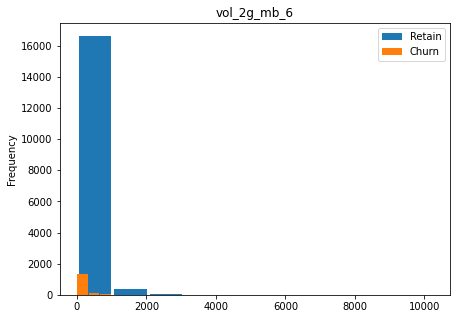

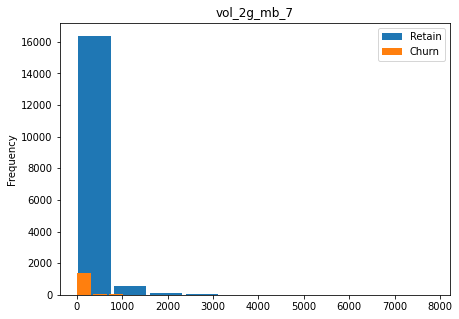

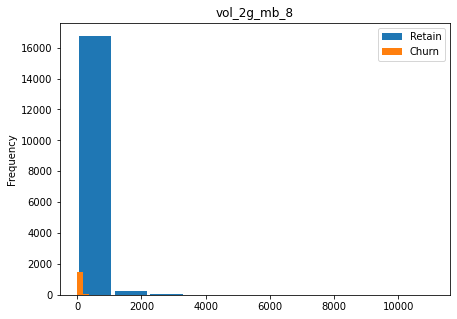

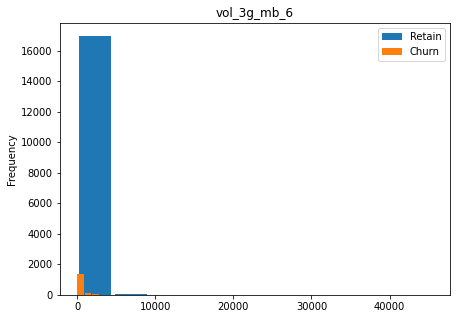

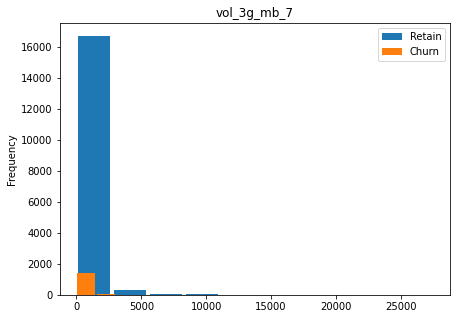

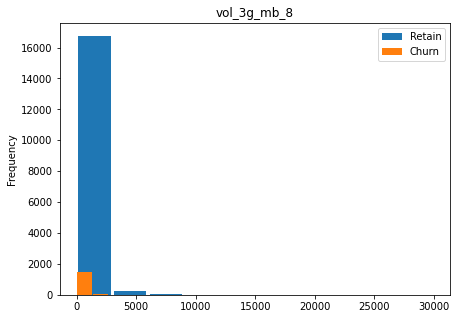

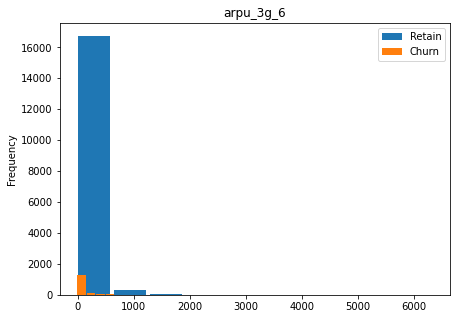

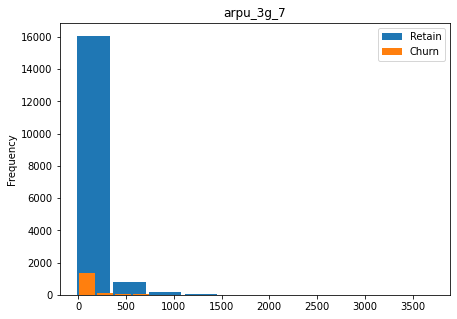

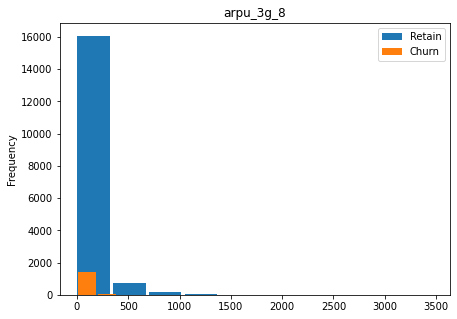

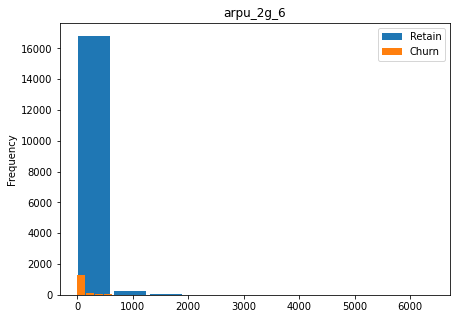

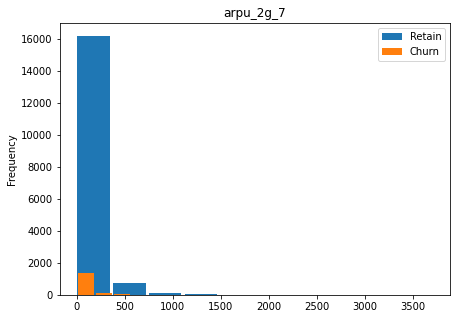

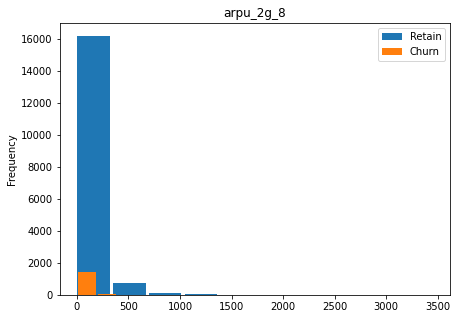

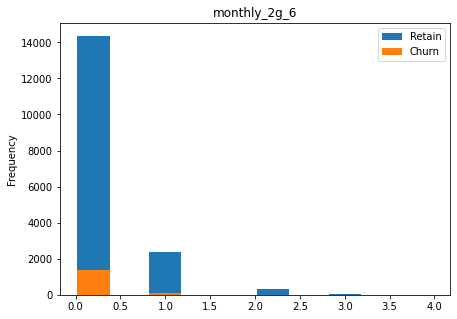

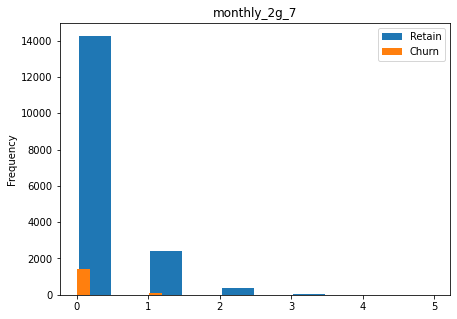

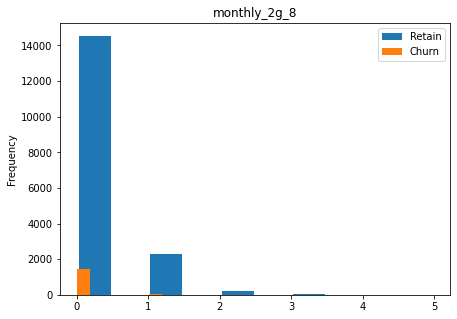

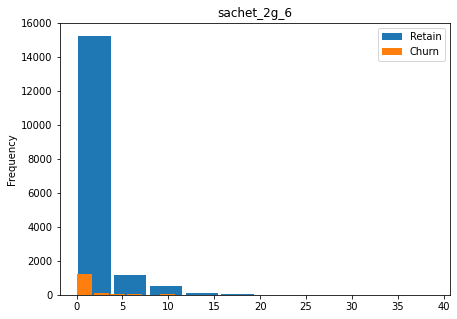

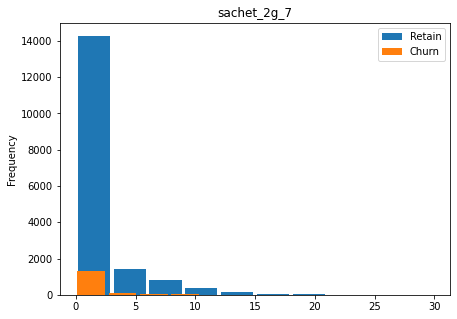

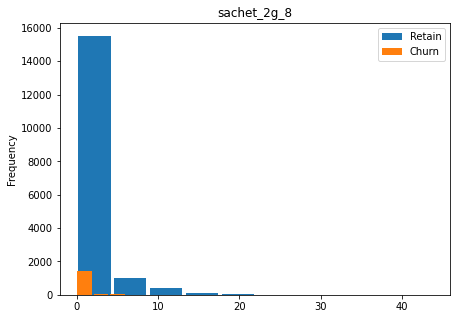

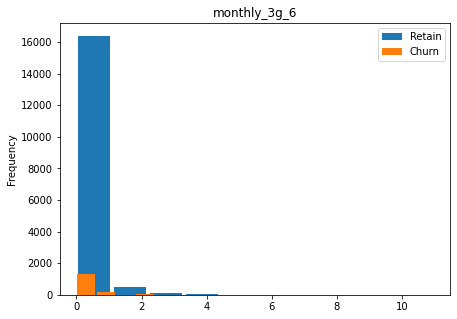

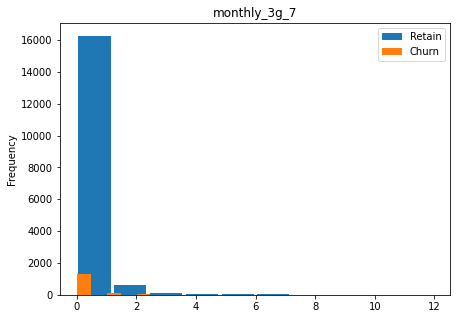

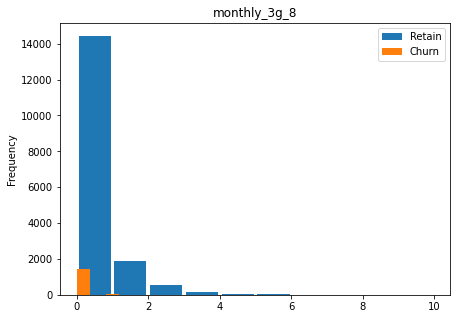

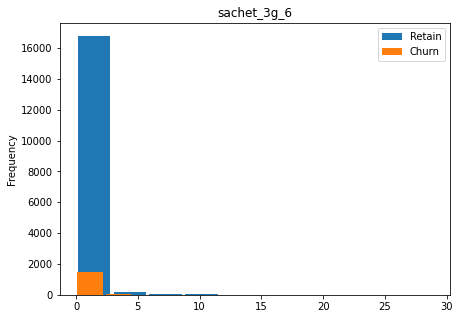

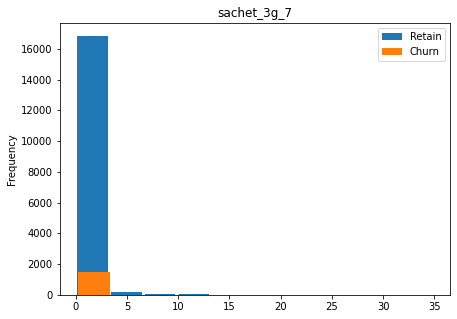

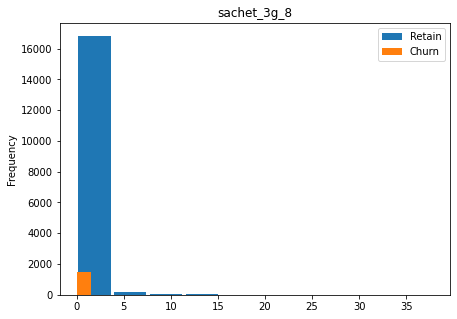

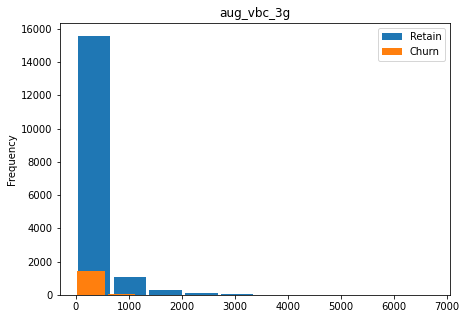

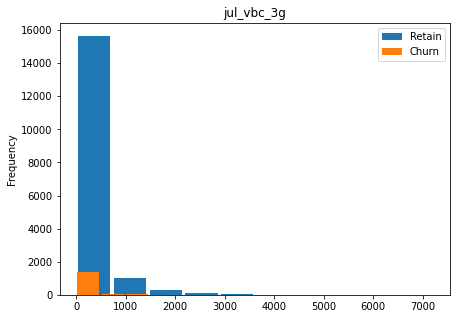

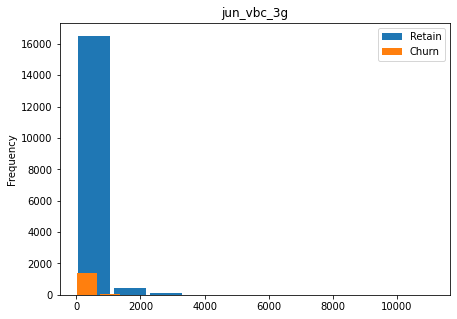

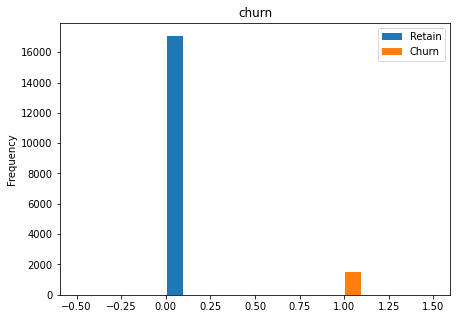

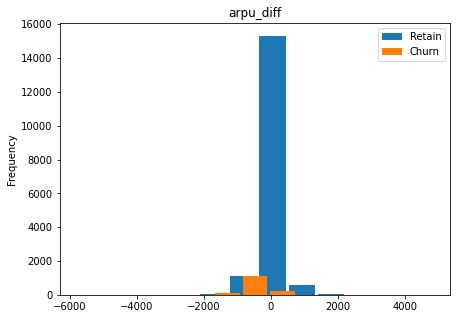

In [39]:
# Creating a function for continuous variables

def contiBplot(x,size = (7,5)):
    plt.figure(figsize= size)
    plt.title(x)
    data_6.groupby('churn')[x].plot(kind = 'hist', rwidth = 0.9)
    plt.legend(['Retain', 'Churn'])
    plt.show()

for i in num_cols:
    contiBplot(i)

#### People giving low Average revenue per user and low recharges have higher churn rate

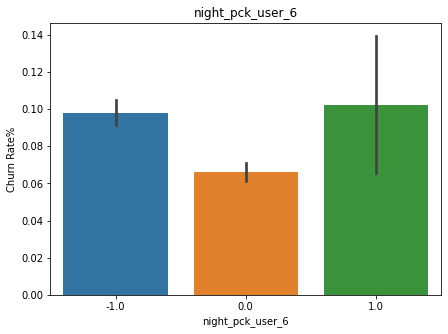

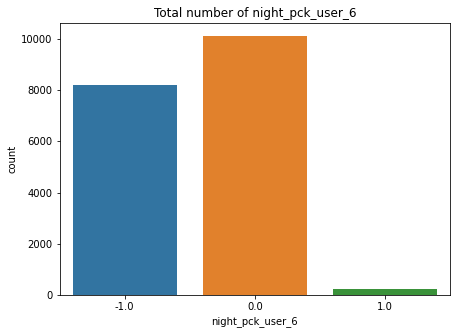

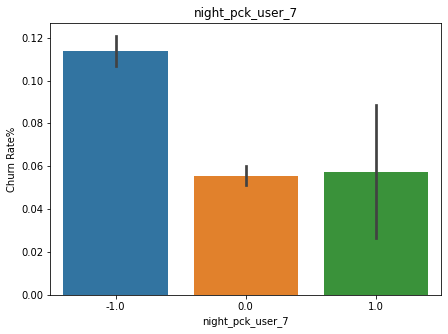

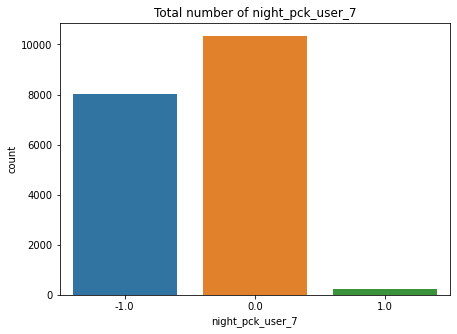

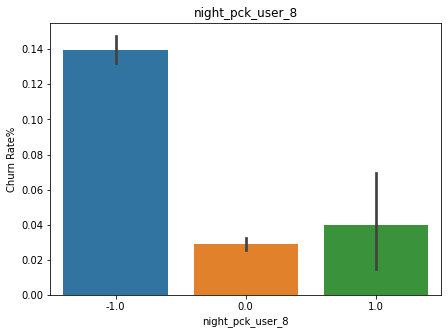

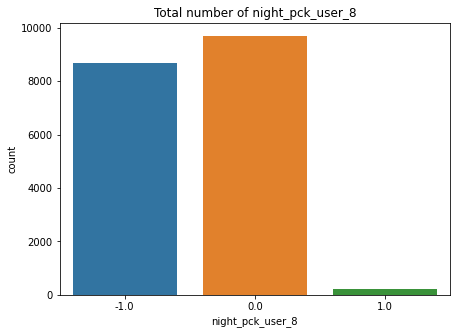

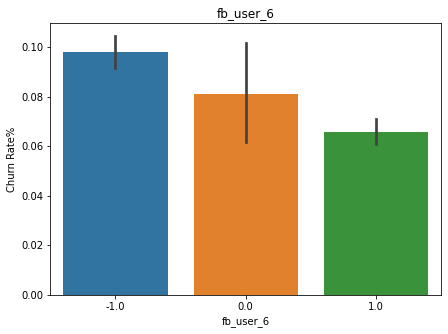

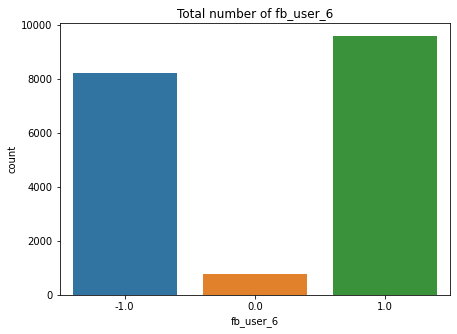

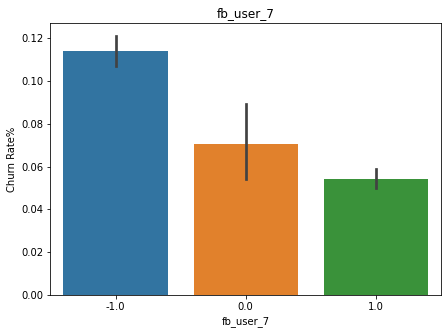

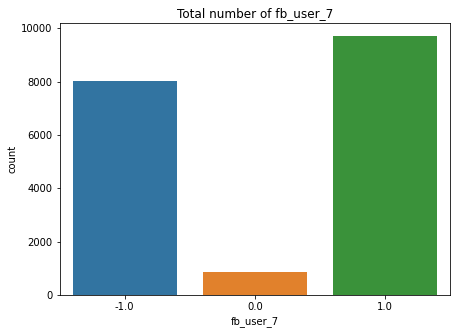

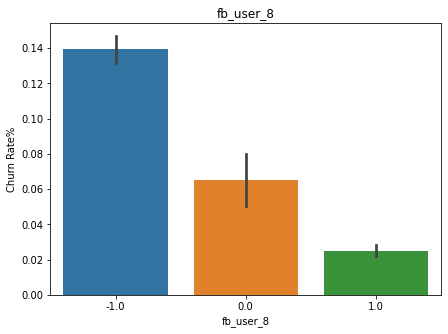

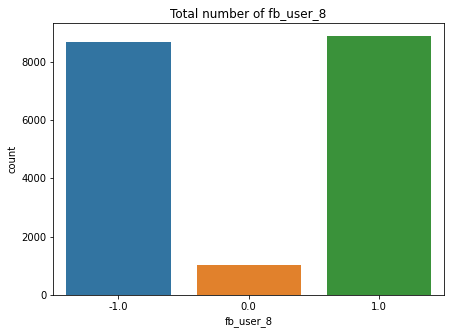

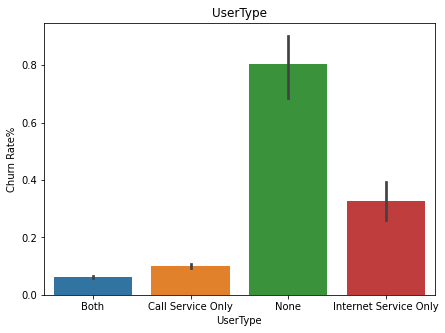

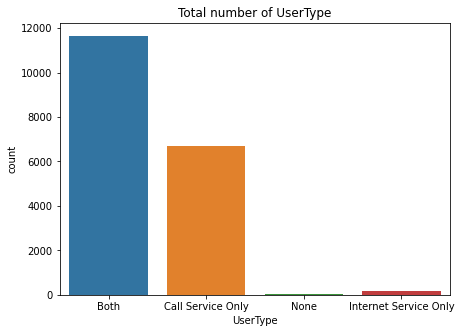

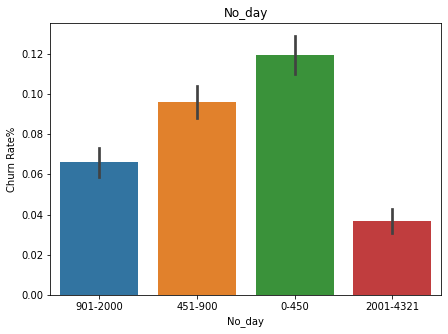

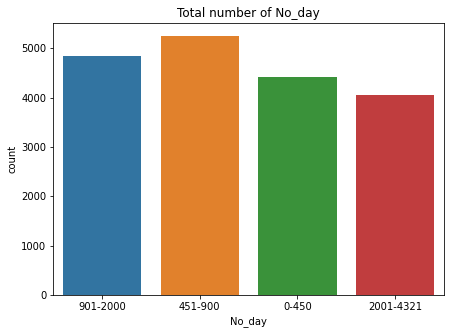

In [40]:
# Bivariate analysis on categorical variable

def bplot(xvalue, size = (7,5)):
    plt.figure(figsize= size)
    chrt = sns.barplot(x=xvalue, y='churn', data=data_6, estimator = np.mean)
    chrt.set_title(xvalue)
    chrt.set_ylabel('Churn Rate%')
    plt.show()
    plt.figure(figsize= size)
    chrt2 = sns.countplot(x=xvalue, data=data_6)
    chrt2.set_title('Total number of '+xvalue)
    plt.show()
    
for i in cat_cols:
    bplot(i)

#### There is high churn rate in the users that do not use Call or Internet services although they are very less people. There is a high churn rate in the customers having low No_days (i.e. 0-450) 

### 3.4.3 Multivariate Analysis

<AxesSubplot: >

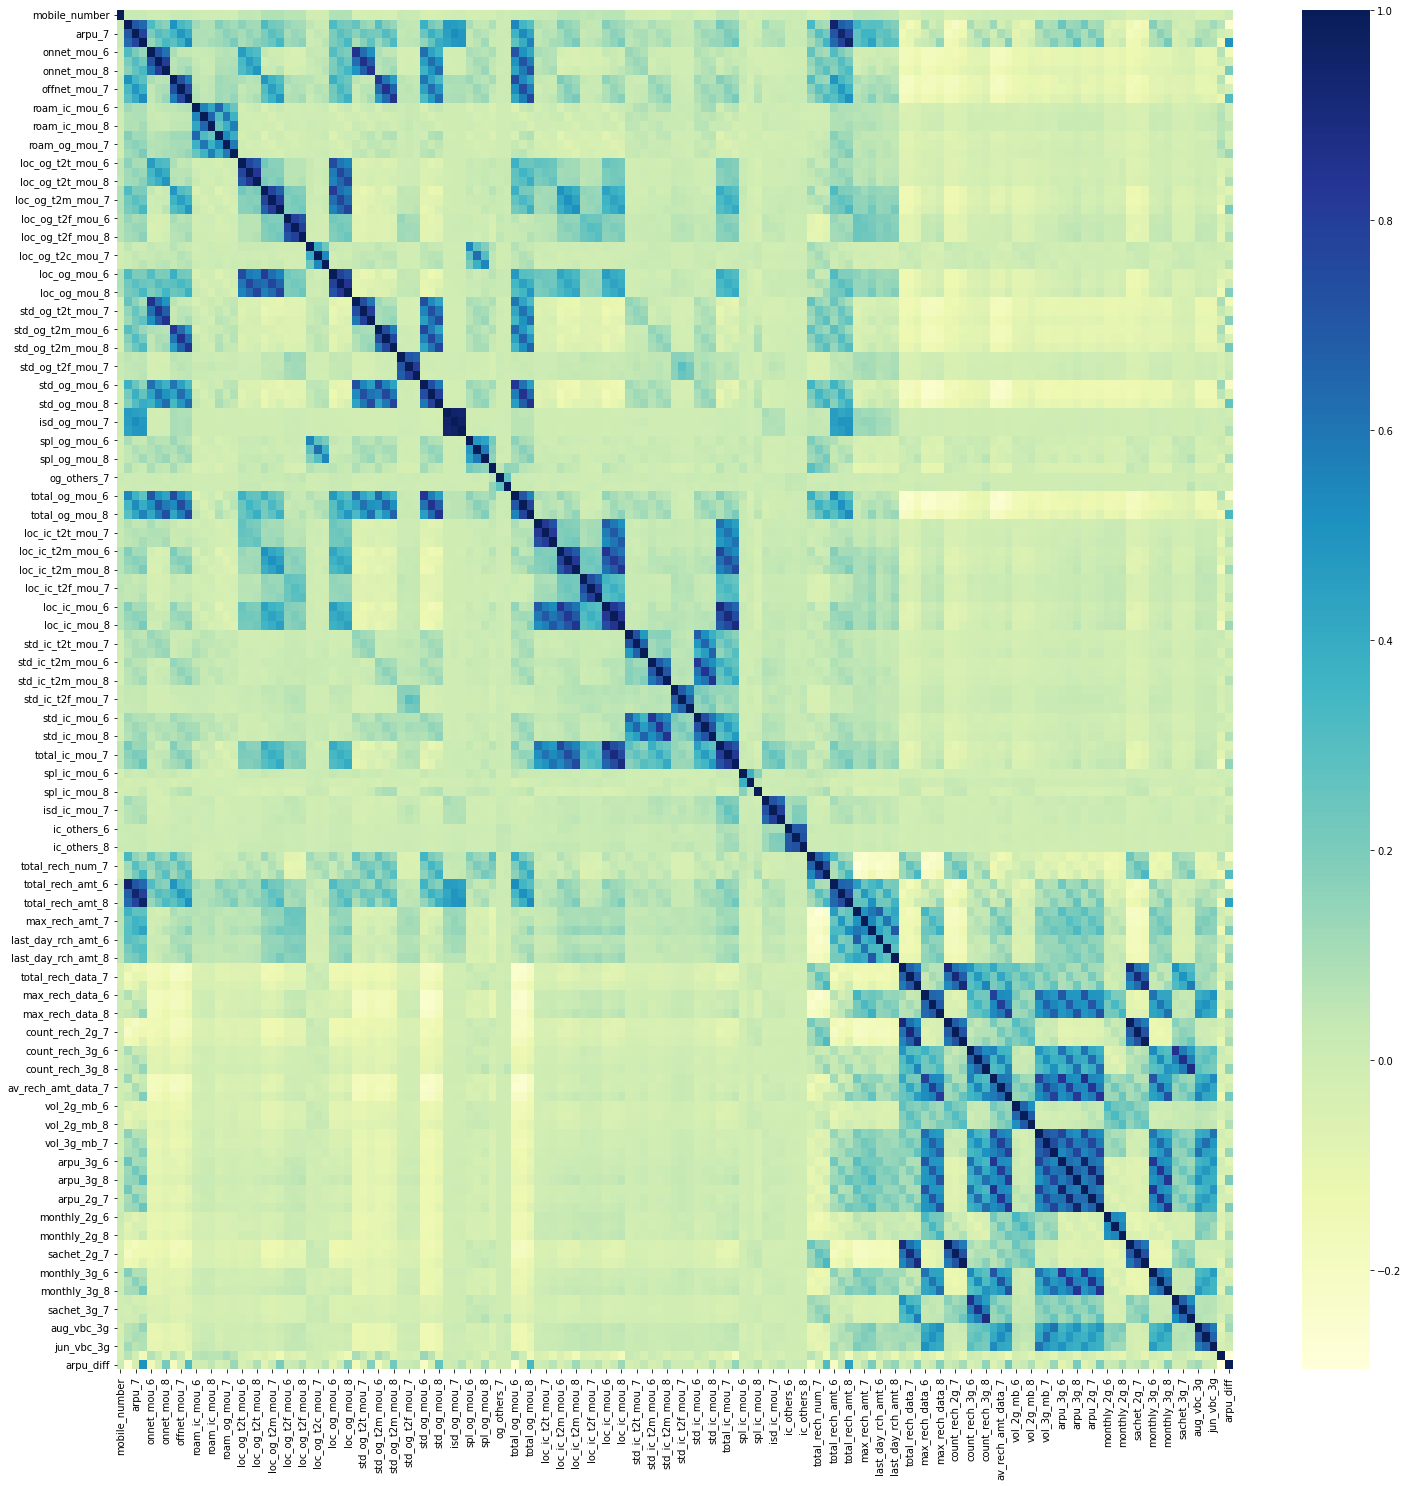

In [41]:
# Creating correlation metric for multivariate analysis

plt.figure(figsize = (25,25))
sns.heatmap(data_6.corr(),cmap="YlGnBu")

#### Mostly all the variables (for the month of June, July and August) have high correlation with each other which is natural since the usage or amount mostly remains the same per user. However, there is a high correlation amongst 3g volume, 2g volume and Average revenue per user. We will deal with this while doing PCA in high accuracy models and VIF in high interpretability models.

### 3.5 Outlier Treatment

In [42]:
data_6.describe([0.01,0.05,0.25,0.50,0.75,0.9,0.95])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   1.857100e+04  18571.000000  18571.000000  18571.000000  18571.000000   
mean    7.001208e+09    557.180492    557.381979    507.708586    257.509787   
std     6.921997e+05    472.732694    488.491095    508.962781    451.369151   
min     7.000000e+09  -2041.228000  -2014.045000   -945.808000      0.000000   
1%      7.000027e+09      0.973000      0.024000      0.000000      0.000000   
5%      7.000127e+09    111.050500    114.156500      9.300500      0.000000   
25%     7.000609e+09    308.324500    310.836000    232.901000     17.260000   
50%     7.001210e+09    478.816000    479.313000    429.522000     84.740000   
75%     7.001807e+09    696.153000    693.348000    661.357500    287.470000   
90%     7.002166e+09    993.500000    986.083000    971.697000    740.410000   
95%     7.002285e+09   1239.546500   1253.084500   1255.604000   1122.910000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   6504.340000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  18571.000000  18571.000000  18571.000000  18571.000000  18571.000000   
mean     265.931044    232.550222    375.101335    378.209095    337.995777   
std      478.914319    460.430959    489.838635    504.185344    486.650147   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.400000      0.000000      0.000000   
25%       16.035000     10.690000     71.670000     70.430000     46.285000   
50%       82.960000     65.940000    223.510000    221.190000    184.140000   
75%      287.145000    237.745000    486.890000    489.950000    440.210000   
90%      774.510000    658.480000    892.030000    911.480000    826.710000   
95%     1167.585000   1067.950000   1256.610000   1259.160000   1185.830000   
max     8157.780000  10752.560000   8362.360000   9667.130000  13547.840000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   18571.000000   18571.000000   18571.000000   18571.000000   
mean       16.370894      13.122244      12.844316      26.307207   
std        78.790547      82.605491      78.532526     110.715905   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.260000      14.390000      15.510000      50.610000   
95%        86.085000      57.025000      56.430000     147.920000   
max      2613.310000    3813.290000    4169.810000    2165.440000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   18571.000000   18571.000000      18571.000000      18571.000000   
mean       20.036533      20.117370         84.929958         86.177175   
std        94.281568     104.493927        227.596681        240.688704   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
5%          0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.510000          4.930000   
50%         0.000000       0.000000         24.930000         25.090000   
75%         0.000000       0.000000         79.060000         79.450000   
90%        31.080000      29.090000        189.430000        192.010000   
95%       103.290000     100.445000        323.795000        325.155000   
max      1878.860000    3493.360000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc

In [43]:
# Creating another variable for numerical columns to remove churn

num_cols2 = []
for i in num_cols:
    if i == 'churn':
        continue
    else:
        num_cols2.append(i)
num_cols2

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

## Outlier Treatment capping the values with Quantile ranges

In [44]:
# Outlier Treatment of the continuous variables by capping the outliers to percentile 1 and percentile 99

data_7 = data_6[:]

for col in num_cols2:
    percentiles = data_7[col].quantile([0.01, 0.99]).values
    data_7[col] = np.clip(data_7[col], percentiles[0], percentiles[1])

In [45]:
data_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18571 entries, 0 to 61902
Columns: 155 entries, mobile_number to UserType
dtypes: float64(124), int64(23), object(8)
memory usage: 22.1+ MB


In [46]:
# Checking the outlier treatment is done correctly

data_7.describe([0.01,0.05,0.25,0.50,0.75,0.95,0.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   1.857100e+04  18571.000000  18571.000000  18571.000000  18571.000000   
mean    7.001208e+09    547.462470    548.180565    497.650644    249.286567   
std     6.921997e+05    359.083532    356.885203    379.874019    399.355573   
min     7.000000e+09      0.973000      0.024000      0.000000      0.000000   
1%      7.000027e+09      0.991900      0.028200      0.000000      0.000000   
5%      7.000127e+09    111.050500    114.156500      9.300500      0.000000   
25%     7.000609e+09    308.324500    310.836000    232.901000     17.260000   
50%     7.001210e+09    478.816000    479.313000    429.522000     84.740000   
75%     7.001807e+09    696.153000    693.348000    661.357500    287.470000   
95%     7.002285e+09   1239.546500   1253.084500   1255.604000   1122.910000   
99%     7.002386e+09   1997.718180   1982.671700   1948.811120   2128.695600   
max     7.002411e+09   1998.054600   1982.951000   1948.930400   2130.342000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  18571.000000  18571.000000  18571.000000  18571.000000  18571.000000   
mean     256.487978    222.895433    366.696636    369.156311    327.891490   
std      414.045738    386.989131    436.523573    443.805770    416.864523   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.400000      0.000000      0.000000   
25%       16.035000     10.690000     71.670000     70.430000     46.285000   
50%       82.960000     65.940000    223.510000    221.190000    184.140000   
75%      287.145000    237.745000    486.890000    489.950000    440.210000   
95%     1167.585000   1067.950000   1256.610000   1259.160000   1185.830000   
99%     2187.155200   2137.271500   2354.073500   2441.493000   2245.030400   
max     2187.214000   2137.765000   2355.785000   2442.270000   2247.248000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   18571.000000   18571.000000   18571.000000   18571.000000   
mean       13.751429       9.771055       9.914865      22.893490   
std        50.206821      39.293868      39.726318      79.813577   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
5%          0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        86.085000      57.025000      56.430000     147.920000   
99%       350.452100     286.286300     287.896000     530.711400   
max       350.597000     286.511000     287.980000     531.018000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   18571.000000   18571.000000      18571.000000      18571.000000   
mean       16.703122      16.077420         76.675386         77.337343   
std        62.937827      61.068696        149.518013        151.456808   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
5%          0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.510000          4.930000   
50%         0.000000       0.000000         24.930000         25.090000   
75%         0.000000       0.000000         79.060000         79.450000   
95%       103.290000     100.445000        323.795000        325.155000   
99%       440.728500     431.052800       1001.633600       1018.624500   
max       441.075000     431.666000       1002.902000       1018.845000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc

### 3.6 Dummy Variable Creation

In [47]:
data_8 = data_7[:]
dummy1 = pd.get_dummies(data_8[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
                                  'fb_user_8','No_day','UserType']], drop_first=True)
dummy1

night_pck_user_6_0.0  night_pck_user_6_1.0  night_pck_user_7_0.0  \
0                         1                     0                     1   
7                         0                     0                     0   
8                         0                     0                     1   
21                        0                     0                     0   
23                        0                     0                     1   
...                     ...                   ...                   ...   
61884                     0                     0                     0   
61892                     0                     0                     0   
61896                     0                     0                     0   
61900                     0                     0                     0   
61902                     0                     0                     1   

       night_pck_user_7_1.0  night_pck_user_8_0.0  night_pck_user_8_1.0  \
0                         0                     1                     0   
7                         0                     0                     0   
8                         0                     1                     0   
21                        0                     0                     0   
23                        0                     1                     0   
...                     ...                   ...                   ...   
61884                     0                     0                     0   
61892                     0                     0                     0   
61896                     0                     0                     0   
61900                     0                     0                     0   
61902                     0                     1                     0   

       fb_user_6_0.0  fb_user_6_1.0  fb_user_7_0.0  fb_user_7_1.0  \
0                  0              1              0              1   
7                  0              0              0              0   
8                  0              0              0              1   
21                 0              0              0              0   
23                 0              0              0              1   
...              ...            ...            ...            ...   
61884              0              0              0              0   
61892              0              0              0              0   
61896              0              0              0              0   
61900              0              0              0              0   
61902              0              0              0              1   

       fb_user_8_0.0  fb_user_8_1.0  No_day_2001-4321  No_day_451-900  \
0                  0              1                 0               0   
7                  0              0                 0               1   
8                  0              1                 0               0   
21                 0              0                 0               1   
23                 0              1                 0               1   
...              ...            ...               ...             ...   
61884              0              0                 0               0   
61892              0              0                 0               0   
61896              0              0                 1               0   
61900              0              0                 0               0   
61902              0              1                 1               0   

       No_day_901-2000  UserType_Call Service Only  \
0                    1                           0   
7                    0                           1   
8                    0                           0   
21                   0                           1   
23                   0                           0   
...                ...                         ...   
61884                1                           1   
61892                1                           1   
61896        

In [48]:
# Creating a dummy variable for categorical variables and dropping the first one.

data_8 = data_7[:]
dummy1 = pd.get_dummies(data_8[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
                                  'fb_user_8','No_day','UserType']], drop_first=True)

# Adding the results to the master dataframe
data_8 = pd.concat([data_8, dummy1], axis=1)
data_8.head()

mobile_number    arpu_6    arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.8030         0.00         0.00   
7      7000701601  1069.180  1349.850  1948.9304        57.84        54.68   
8      7001524846   378.721   492.223   137.3620       413.69       351.03   
21     7002124215   514.453   597.753   637.7600       102.41       132.11   
23     7000887461    74.350   193.897   366.9660        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21    

In [49]:
data_8.shape

(18571, 173)

In [50]:
data_8 = data_8.drop(columns = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7',
                                  'fb_user_8','No_day','UserType'])
data_8.shape

(18571, 165)

# This was the Preprocessed dataset for the training

In [51]:
data_8.head()

mobile_number    arpu_6    arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.8030         0.00         0.00   
7      7000701601  1069.180  1349.850  1948.9304        57.84        54.68   
8      7001524846   378.721   492.223   137.3620       413.69       351.03   
21     7002124215   514.453   597.753   637.7600       102.41       132.11   
23     7000887461    74.350   193.897   366.9660        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21    

In [52]:
Preprocess_data_set=data_8

### 3.7 Train Test Split

In [53]:
X = Preprocess_data_set.drop(['churn','mobile_number'], axis = 1)
y = Preprocess_data_set['churn']

In [54]:
# Splitting the Train and Test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12999, 163)
(5572, 163)
(12999,)
(5572,)


### 3.8 Scaling the data using standard scaler

In [55]:
# Using the standard scaler

scaler = StandardScaler()

X_train[num_cols2] = scaler.fit_transform(X_train[num_cols2])

X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
57126 -0.071696 -0.176398  0.706407     0.410968     0.516615     1.106694   
23350  0.870479  0.188289  1.843497    -0.303935    -0.381862    -0.402949   
15855 -0.162747 -0.329149 -0.504990    -0.602890    -0.570671    -0.548855   
43200  1.123307  0.957458  1.017629    -0.031254    -0.172521    -0.180800   
21149 -0.120986 -0.080317 -0.052886     1.967471     1.482675     0.343288   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
57126     -0.563102     -0.474012     -0.543399      -0.274504      -0.250166   
23350     -0.479960     -0.167340     -0.377215       1.069708      -0.250166   
15855     -0.400172     -0.268585     -0.549716      -0.274504       0.248827   
43200      0.415627      0.344013      0.536822      -0.274504      -0.250166   
21149     -0.453946     -0.216064     -0.630549      -0.274504      -0.250166   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
57126      -0.249501      -0.285887      -0.266216      -0.262534   
23350       1.284136       0.989850      -0.266216       0.285279   
15855       0.718653      -0.285887       0.926792       0.561568   
43200      -0.249501      -0.285887      -0.266216      -0.262534   
21149       1.095392      -0.285887      -0.266216       0.349872   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
57126          0.514185          0.419560         -0.020727         -0.404891   
23350         -0.412679         -0.508500         -0.485444         -0.432778   
15855         -0.461782         -0.419912         -0.479096         -0.446859   
43200          0.696996          0.371101          0.118556          1.135949   
21149         -0.390117          3.682380          1.915497         -0.573451   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
57126         -0.085933         -0.367109         -0.279620         -0.307748   
23350          0.028204         -0.382186          1.940863          3.273433   
15855         -0.626369         -0.606654          0.254721          0.226541   
43200          1.475389          1.012648         -0.419884         -0.416772   
21149         -0.579180         -0.563784         -0.419884         -0.416772   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
57126         -0.381723         -0.090806         -0.344819         -0.332769   
23350          1.211938         -0.341292          1.811767         -0.334985   
15855         -0.124606         -0.341292         -0.344819         -0.334985   
43200         -0.397166         -0.341292         -0.344819         -0.334985   
21149         -0.408747         -0.341292         -0.344819         -0.334985   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
57126     -0.065029      0.109162     -0.290029          0.300851   
23350     -0.415083     -0.097986     -0.435565         -0.334175   
15855     -0.515340     -0.621041     -0.637458         -0.444894   
43200      1.027524      1.115219      0.686935         -0.291437   
21149     -0.593599      1.315078      0.418086          2.499889   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
57126          0.461284          1.345552         -0.355458         -0.439733   
23350         -0.180696         -0.270534         -0.422833         -0.339979   
15855         -0.448784         -0.402912         -0.139231         -0.090416   
43200         -0.312497         -0.213287         -0.085393         -0.351405   
21149          0.190869         -0.388865         -0.101564          0.158768   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
57126         -0.360954         -0.242742         -0.238629         -0.232395   
23350         -0.285914          1.370321          2.103987          1.571669   
15855         -0.375428         

### 3.9 Tranforming the test data 

In [56]:
# Fitting the scale on the test data

X_test[num_cols2]=scaler.transform(X_test[num_cols2])
X_test.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
17153 -1.419223 -0.775871 -1.018646    -0.621496    -0.588163    -0.550824   
15633  1.191117  3.215728  0.282056    -0.184931    -0.171742    -0.295837   
4863   0.156939  0.485611  0.469120     0.387258     0.070028    -0.251966   
32369 -0.917666 -0.965840 -0.804604    -0.622778    -0.604852    -0.530235   
47730 -0.790924 -0.601079  0.381763    -0.523311    -0.545540    -0.479476   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
17153     -0.832707     -0.671778     -0.647386      -0.274504      -0.250166   
15633      0.104612     -0.051971     -0.113216      -0.274504      -0.250166   
4863       1.794902      2.877547      2.744277      -0.274504      -0.250166   
32369     -0.670121     -0.704366     -0.732835      -0.274504      -0.250166   
47730     -0.538559     -0.572996     -0.324104      -0.274504      -0.179488   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
17153      -0.249501      -0.285887      -0.266216      -0.262534   
15633      -0.249501      -0.285887      -0.266216      -0.262534   
4863       -0.249501      -0.285887      -0.266216      -0.262534   
32369      -0.249501      -0.285887      -0.266216      -0.262534   
47730      -0.249501      -0.285887      -0.222942      -0.262534   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
17153         -0.507369         -0.432142         -0.449055         -0.718756   
15633          0.644774          0.702315          0.277693          1.050453   
4863          -0.508762         -0.491311         -0.515338         -0.715683   
32369         -0.510753         -0.474651         -0.390375         -0.394250   
47730         -0.248248         -0.319952         -0.245704         -0.156295   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
17153         -0.431733         -0.442638         -0.419884         -0.360455   
15633          0.732460          0.551188          1.217276          0.950719   
4863          -0.711760         -0.710218         -0.419884         -0.416772   
32369         -0.488990         -0.608099         -0.419884         -0.416772   
47730         -0.259068          0.162366         -0.029519          0.126903   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
17153         -0.408747         -0.341292         -0.344819         -0.334985   
15633          0.700021         -0.341292         -0.344819         -0.334985   
4863          -0.408747          1.514347         -0.344819          0.015132   
32369         -0.408747         -0.341292         -0.344819         -0.334985   
47730          0.229026         -0.318288         -0.344819         -0.332769   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
17153     -0.742716     -0.523276     -0.527210         -0.446437   
15633      1.014138      0.838430      0.494744         -0.446437   
4863      -0.741356     -0.738957     -0.733842          0.722212   
32369     -0.530508     -0.583666     -0.611745         -0.446437   
47730     -0.238258     -0.335127     -0.010325         -0.446437   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
17153         -0.450887         -0.412610         -0.478596         -0.474065   
15633         -0.452093         -0.412610         -0.478596         -0.460316   
4863           0.332905         -0.036864          2.708431          3.919708   
32369         -0.452093         -0.412610         -0.478596         -0.476632   
47730         -0.452093         -0.412610         -0.478596         -0.476632   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
17153         -0.445469         -0.242742         -0.238629         -0.232395   
15633         -0.445469         -0.242742          0.586264         -0.232395   
4863           3.976698         

## Imbalance data treatment 
#### 3.10 Using SMOTE technique to balance the data

In [57]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
smot = SMOTE(random_state = 2)
X_train_bal, y_train_bal = smot.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_bal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_bal.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_bal == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_bal == 0)))


Before OverSampling, counts of label '1': 1052
Before OverSampling, counts of label '0': 11947 

After OverSampling, the shape of train_X: (23894, 163)
After OverSampling, the shape of train_y: (23894,) 

After OverSampling, counts of label '1': 11947
After OverSampling, counts of label '0': 11947


### 4.1.1  PCA

In [58]:
# Fitting PCA

pca = PCA( random_state=100)

#Doing the PCA on the train data
pca.fit(X_train_bal)

PCA(random_state=100)

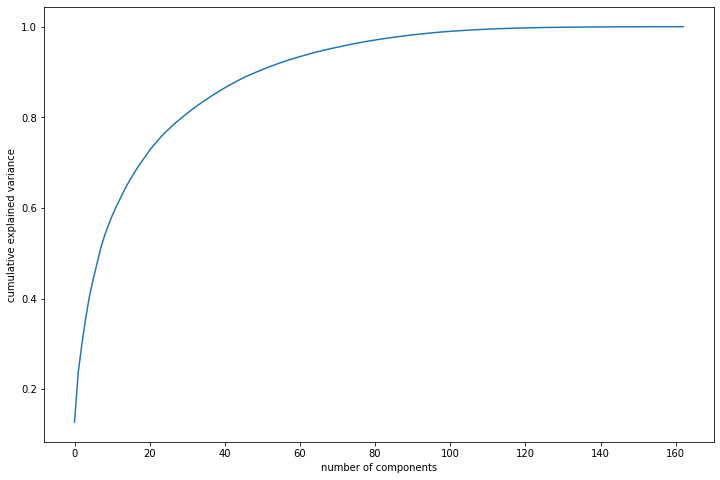

In [59]:
# Making the screeplot - plotting the cumulative variance against the number of components

%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [60]:
# 90% variance explained by 60 principal components

pca = PCA(n_components=60,random_state=100)

#Scale and transform data to get Principal Components

X_train_reduced = pca.fit_transform(X_train_bal)
X_test_reduced = pca.transform(X_test)

print(X_train_reduced.shape)
print(X_test_reduced.shape)

(23894, 60)
(5572, 60)


In [61]:
# Fetching the 60 PC 

PC_col=[]

for i in range(1,61,1):
    PC_col.append('PC'+str(i))

# Creating a new df__train using the PC

df = pd.DataFrame(X_train_reduced, columns=PC_col)
df2 = pd.DataFrame(data = y_train_bal, columns = ['churn'])
df_train = pd.concat([df,df2], axis=1)
df_train.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.241107 -0.481679 -0.827325  4.113607  2.196640 -0.795649 -1.588271   
1  6.312272  7.891717  3.445639 -0.190730  2.388083  2.424523  4.086935   
2  4.374579 -0.070320  2.146727 -1.489947  0.358140 -0.947636  0.992045   
3  3.462817  8.587956 -0.118279  1.057500 -0.575447  1.488072 -0.529749   
4 -2.347687 -0.110455  0.181970  0.607577 -0.050276 -2.686416 -2.206707   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.168787  0.978169 -3.148255 -1.499452  0.070449 -0.736918 -0.885748   
1  9.554900 -3.479005 -1.617588 -3.262511  2.338847 -0.535015  6.348281   
2 -1.044137 -0.009589 -1.786292  2.079680  0.076770  0.395387 -0.524211   
3  1.331809 -1.631358 -0.478098  0.497228 -0.087279 -1.654307 -2.133483   
4 -0.416793  0.080037 -0.930683  0.516311  0.962236 -0.269830 -1.217500   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  0.485223 -0.455868 -0.181882  0.913165 -0.428956  1.611424  1.284854   
1  1.127715 -2.486065  1.539972  0.633428  3.512628  5.690872  0.209277   
2  0.115708  0.515313 -0.571572  0.262636 -1.024693  0.097437 -0.313050   
3  0.769546 -2.724561 -0.837633 -0.311355 -0.490379 -0.305089 -0.263286   
4  1.664510  1.242630  1.319540 -0.129286 -0.345689  0.683879 -1.375008   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0  1.920006 -1.963539  2.108323  0.793315  0.558404  0.353074  0.757616   
1  0.357611 -1.394726 -2.643174 -0.612023 -1.309305 -0.783706 -2.152255   
2 -0.380609  0.956877  1.497375  0.225904  0.224197  0.181457  0.492886   
3 -0.907497 -0.202571  0.476811 -0.589660 -0.053743  0.364833 -0.351904   
4  0.552812  0.277564 -0.852530  0.076369 -0.421922 -0.315290 -1.295606   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0  0.209029 -0.229611 -0.155134  0.690712 -0.158879 -1.093007 -0.587914   
1  0.014048 -1.577634 -2.484235  0.939451  2.262976  1.551097 -2.227544   
2  0.218621  0.195492 -0.048111  0.281876 -0.520221 -0.418853 -0.152417   
3 -0.467341 -0.033958  0.196118 -0.108054  0.743123  0.892276 -0.328283   
4 -0.522864 -0.335065 -0.329988 -0.541584 -0.631079 -0.683428  0.437033   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0 -0.645091 -0.125708 -0.229227  0.522636  0.134256  0.178887  1.478260   
1  1.152970  2.071115  2.912364  2.139795  5.804120 -0.382528 -1.225624   
2  0.053302  0.354591 -0.078258  0.363715  0.124477  0.033198 -0.026928   
3 -0.414010  0.007771 -0.418242 -1.207719 -0.397703 -0.190643 -0.735714   
4  0.944330 -0.516152  0.076293  0.638444 -0.471013 -0.825297  0.848047   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0  0.191793  0.011197 -0.488146  0.176991 -0.362728 -1.108469 -0.037830   
1  1.647575 -1.617131 -0.001364 -0.163429  0.858923 -0.219234 -1.150661   
2  0.293403 -0.019527  0.056382 -0.096163  0.485881  1.183318 -0.059864   
3  0.288929 -0.500748  0.225566  0.010248 -0.083587  0.570803  0.142774   
4  0.482078 -0.925730 -0.067304 -0.253226 -0.252013 -0.064113  0.196503   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0 -1.547304 -0.481532  0.822709  0.900599  1.227235  0.549341 -0.294853   
1 -0.248763 -0.643980 -0.348399 -0.504134  1.180700 -0.328299  0.703080   
2 -0.540921 -0.721722 -0.289045  0.128835 -0.783534  0.035111  0.305584   
3  0.068114 -0.285152  0.203029  0.449383  0.129718  0.846424  0.065604   
4 -0.373123 -0.465847  0.402402 -0.081295  0.321441 -0.344467  0.424691   

       PC57      PC58      PC59      PC60  churn  
0 -0.692356  1.544721  0.045127  0.322006      0  
1 -0.575039 -0.145094 -0.340729 -0.085014      0  
2 -0.548992 -2.219178  0.715934  0.122530      0  
3 -0.680272 -0.119930 -0.181420 -0.385422      0  
4 -0.349814 -0.124939  0.826078 -1.088514      0

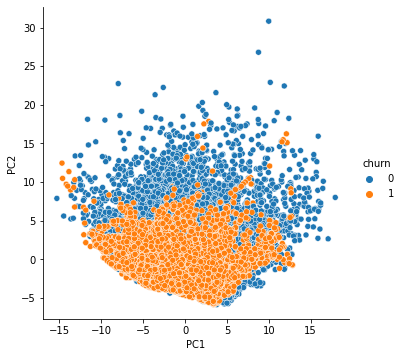

In [62]:
# Visualizing the two most important principal components

sns.pairplot(data=df_train, x_vars=["PC1"], y_vars=["PC2"], hue = "churn", size=5)

In [63]:
# Creating a new df_test using the PC

df_t = pd.DataFrame(X_test_reduced, columns=PC_col)
df2_t = pd.DataFrame(data = y_test, columns = ['churn']).reset_index(drop=True)
df_test = pd.concat([df_t,df2_t],axis=1)
df_test.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.168720 -3.556351 -1.414719  0.866320  1.023079 -1.173702  0.840614   
1  1.664174  7.210907  0.128501 -3.793732 -2.135736 -1.269771 -0.356642   
2 -6.299283  1.546892  3.045907  2.906880  0.545553  0.878725  4.597690   
3  3.419759 -2.585576 -1.066909 -0.015056  0.307540 -1.620543  1.433393   
4  4.578009  2.305127 -0.300107 -0.999724  0.207178 -2.620005  1.335305   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.794739 -0.053661  1.502182  1.507270  0.470882  0.318382 -0.428866   
1 -2.110988  2.211572  0.972466  4.438302  2.747380 -1.919802  2.016369   
2 -1.911201 -1.189773 -0.327992 -1.016480 -0.417857 -0.157276  0.217414   
3 -0.586941 -0.298712 -0.767973  0.875182 -0.791562 -0.080356 -0.072509   
4 -1.421518 -0.635655 -1.003619  1.413881  0.823606  1.373663 -1.364351   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0  0.638646  0.138751 -0.437210 -0.193805  0.355145 -0.272104 -0.179762   
1  0.372869 -0.489595 -0.436260 -1.555682 -2.019530 -3.657868  2.143327   
2 -1.494986  0.816695  1.029170 -0.778410 -0.648774 -1.251682  0.631241   
3  0.035562  1.416914 -1.338234  1.018943  0.084158 -0.536544 -0.498817   
4 -0.698394  0.081799 -0.342378 -0.609311 -1.236798 -0.645530  0.353634   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.765939  1.202365 -0.716536 -0.784417  0.073274 -0.371131  0.088996   
1 -1.355624 -1.704736 -0.022610  2.408295  2.512705 -1.079276  1.455577   
2 -0.281631  0.104242 -0.351747  0.218941 -0.540917  1.312133 -0.780508   
3 -0.744272  0.635607 -0.394193  1.960285 -0.674274  0.541423 -0.846325   
4  0.189115  0.297023  1.957615 -0.022383 -0.295748  0.318632  0.441628   

       PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0 -0.038533 -0.244769  0.228302 -0.218324  0.250694  0.779315 -0.153019   
1  1.176596 -0.942462 -0.980164  0.227507  0.299688 -0.766884 -1.485792   
2  1.029742 -0.249362  0.586111 -1.411772 -2.585667  1.484140  0.489662   
3 -0.894911  0.367573  1.150482 -2.653132  0.592774 -1.793809  0.471871   
4  0.018904 -0.465094 -0.145357 -0.431305  0.178958 -0.548983  0.744650   

       PC36      PC37      PC38      PC39      PC40      PC41      PC42  \
0  0.111582  0.187863  0.292789 -0.045949 -0.190573 -0.226821 -0.177841   
1  0.504637 -0.689821 -0.010522 -0.322744  0.084486  0.452808  1.099469   
2  0.622873 -1.321615 -0.113532 -0.959071  0.374815  0.586272  0.147147   
3 -1.495248 -0.651059 -0.121758 -0.036232  0.175851  4.981298 -0.563529   
4 -0.983345 -0.773483 -0.373618 -0.116101 -0.258827 -0.435356 -0.272410   

       PC43      PC44      PC45      PC46      PC47      PC48      PC49  \
0 -0.140544  0.194210  0.189024 -0.055214  0.060519  0.122378  0.012893   
1  0.340067  0.479520  0.125776  0.091741  0.393254  0.278405  0.049558   
2  0.504771 -0.033373 -0.074069  4.469484  0.523659 -0.243856  0.751607   
3  1.204725  0.257990  0.504419  1.024347 -0.234703  0.888978  0.743780   
4  0.588791  0.446303  0.407367 -0.074651  0.471263  1.476997  0.289158   

       PC50      PC51      PC52      PC53      PC54      PC55      PC56  \
0 -0.234504 -0.120372  0.267656  0.236051 -0.102146  0.296997 -0.021211   
1 -0.785862  0.182187 -0.627827 -0.865984 -1.567816 -1.667420 -0.867952   
2 -0.111127 -0.474296 -0.003758 -0.373448 -0.679396 -0.236682 -0.005694   
3 -0.505823 -1.461752  0.676242  1.217813  0.595623  0.221448  0.085758   
4 -0.093071 -0.403877 -0.528355 -0.305554 -1.042552 -0.240881 -0.153984   

       PC57      PC58      PC59      PC60  churn  
0 -0.487764 -0.381441  0.133056 -0.111130      0  
1 -0.747623 -0.275085 -0.038645 -0.425365      0  
2  0.310661  0.063102  0.366279 -0.202907      0  
3 -0.411432  0.396480 -0.194312 -0.256276      0  
4 -0.485090 -1.262908  0.270057 -0.077110      0

### Model 1: Logistic Regression with PCA

In [64]:
# Creating X and y for train and test respectively using PCA datasets

y_train_pca = df_train['churn']
X_train_pca = df_train.drop(columns = ['churn'],axis = 1)
y_test_pca = df_test['churn']
X_test_pca = df_test.drop(columns = ['churn'],axis = 1)

In [65]:
# Fitting the Logistic regression model
regr = LogisticRegression()

# Train the model using the training sets
regr.fit(X_train_pca, y_train_pca)

# Make predictions using the testing set
y_pred = regr.predict(X_test_pca)

In [66]:
# Predicting the y train

y_test_pred_f = pd.DataFrame({'Churn':y_test_pca, 'Churn_Pred':y_pred})
y_test_pred_f.head()

Churn  Churn_Pred
0      0           0
1      0           0
2      0           0
3      0           0
4      0           0

In [67]:
# Creating the Confusion Matrix

confusion = metrics.confusion_matrix(y_test_pred_f.Churn, y_test_pred_f.Churn_Pred)
print(confusion)

# Let's check the overall accuracy.

print(metrics.accuracy_score(y_test_pred_f.Churn, y_test_pred_f.Churn_Pred))

[[4257  868]
 [  87  360]]
0.8286073223259153


In [68]:
# Calculating Recall metric

print(recall_score(y_test_pred_f.Churn, y_test_pred_f.Churn_Pred))

0.8053691275167785


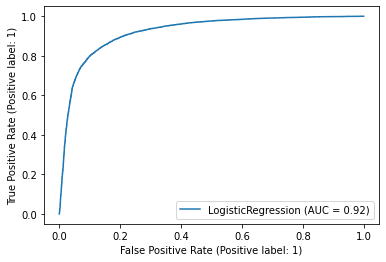

In [69]:
# Plotting ROC Curve

plot_roc_curve(regr, X_train_pca, y_train_pca, drop_intermediate=False)
plt.show()

In [70]:
regr.coef_

array([[-0.17954244, -0.52218864,  0.29479708, -0.33186624, -0.34392573,
         0.23625282, -0.16323069,  0.0725577 ,  0.07427204,  0.31812589,
         0.21473354, -0.00329135, -0.3487622 ,  0.09193299,  0.07913572,
        -0.1309902 ,  0.06063691,  0.06644934, -0.19590047,  0.16968798,
        -0.11727293, -0.11856949, -0.1053692 ,  0.23974468,  0.03896478,
        -0.08431863,  0.15528793,  0.49554423,  0.03117036,  0.24689424,
         0.05877205,  0.11308989,  0.04167004,  0.18011234, -0.02137317,
         0.04536795, -0.08165255,  0.04497857, -0.09648608,  0.08742298,
        -0.2677134 , -0.12695851,  0.0634643 , -0.01883403, -0.25321905,
        -0.67964169, -0.28587673,  0.03558049, -0.0329226 ,  0.16298825,
         0.04431092,  0.26575904, -0.03618676,  0.39254455, -0.14374462,
         0.12722041,  0.34791105,  0.02715196,  0.1224411 , -0.41666347]])

#### High accuracy model Logistic Regression with PCA gives AUC of 0.92 and Recall of 80.7%. Let's try another model!

## Model 2: Random Forest

In [71]:
# Running the random forest with default parameters.

rfc = RandomForestClassifier()

# Fitting on Train

rfc.fit(X_train_pca,y_train_pca)

# Making predictions

predictions = rfc.predict(X_test_pca)

# Let's check the report of our default model

print(classification_report(y_test_pca,predictions))

# Printing confusion matrix and accuracy

print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5125
           1       0.45      0.44      0.45       447

    accuracy                           0.91      5572
   macro avg       0.70      0.70      0.70      5572
weighted avg       0.91      0.91      0.91      5572

[[4889  236]
 [ 251  196]]
0.9125987078248384
